In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drive/MyDrive/House_Price.csv')

In [3]:
df.head()

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

In [4]:
# 1. Basic information about the dataset
print("\n1. Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n2. Column Names and Data Types:")
print(df.dtypes)

print("\n3. Missing Values:")
print(df.isnull().sum())

print("\n4. Sample Records:")
display(df.head(3))
display(df.sample(5, random_state=42))

print("\n5. Basic Statistics:")
display(df.describe(include='all').T)


1. Dataset Shape:
Rows: 50000, Columns: 6

2. Column Names and Data Types:
SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

3. Missing Values:
SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

4. Sample Records:


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
33553        1894         5          1        Rural       1975  170835.035713
9427         1001         5          3       Suburb       1963  126913.469998
199          2264         4          3       Suburb       1964  246611.883092
12447        2299         5          1       Suburb       1999  244250.462969
39489        2651         2          1       Suburb       1951  271127.650112


5. Basic Statistics:


count unique     top   freq           mean           std  \
SquareFeet    50000.0    NaN     NaN    NaN     2006.37468    575.513241   
Bedrooms      50000.0    NaN     NaN    NaN         3.4987      1.116326   
Bathrooms     50000.0    NaN     NaN    NaN        1.99542      0.815851   
Neighborhood    50000      3  Suburb  16721            NaN           NaN   
YearBuilt     50000.0    NaN     NaN    NaN     1985.40442     20.719377   
Price         50000.0    NaN     NaN    NaN  224827.325151  76141.842966   

                       min            25%            50%            75%  \
SquareFeet          1000.0         1513.0         2007.0         2506.0   
Bedrooms               2.0            3.0            3.0            4.0   
Bathrooms              1.0            1.0            2.0            3.0   
Neighborhood           NaN            NaN            NaN            NaN   
YearBuilt           1950.0         1967.0         1985.0         2003.0   
Price        -36588.165397  169955.860225  225052.141166  279373.630052   

                        max  
SquareFeet           2999.0  
Bedrooms                5.0  
Bathrooms               3.0  
Neighborhood            NaN  
YearBuilt            2021.0  
Price         492195.259972

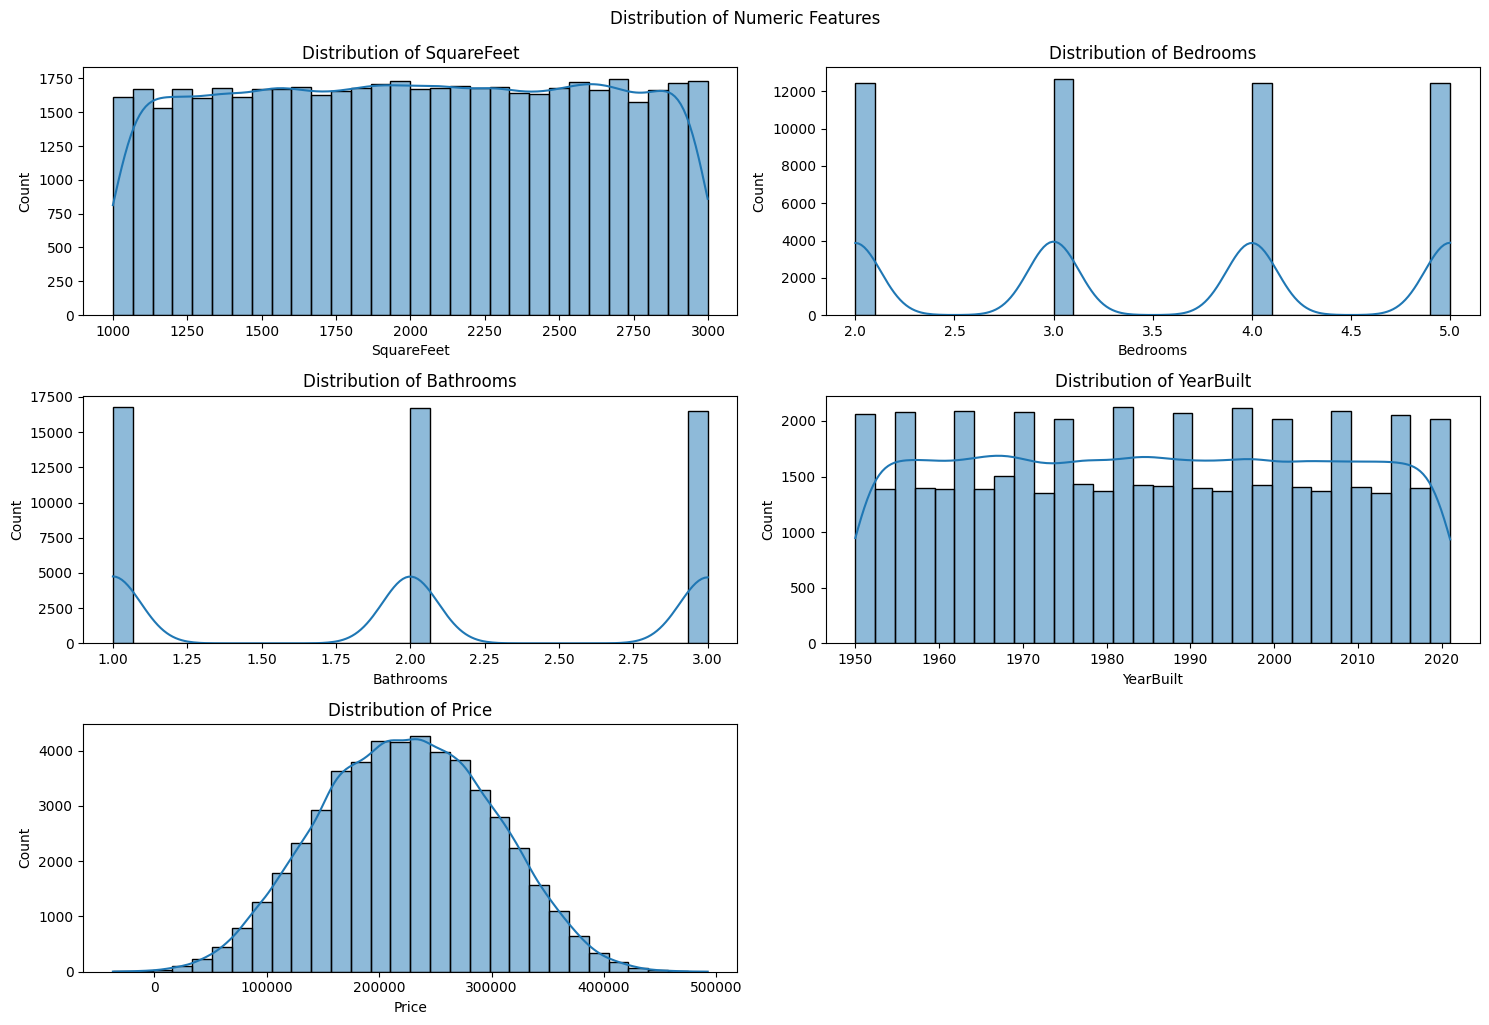

In [5]:
# Visualization 1: Numeric Features Distribution
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Distribution of Numeric Features', y=1.02)
plt.show()

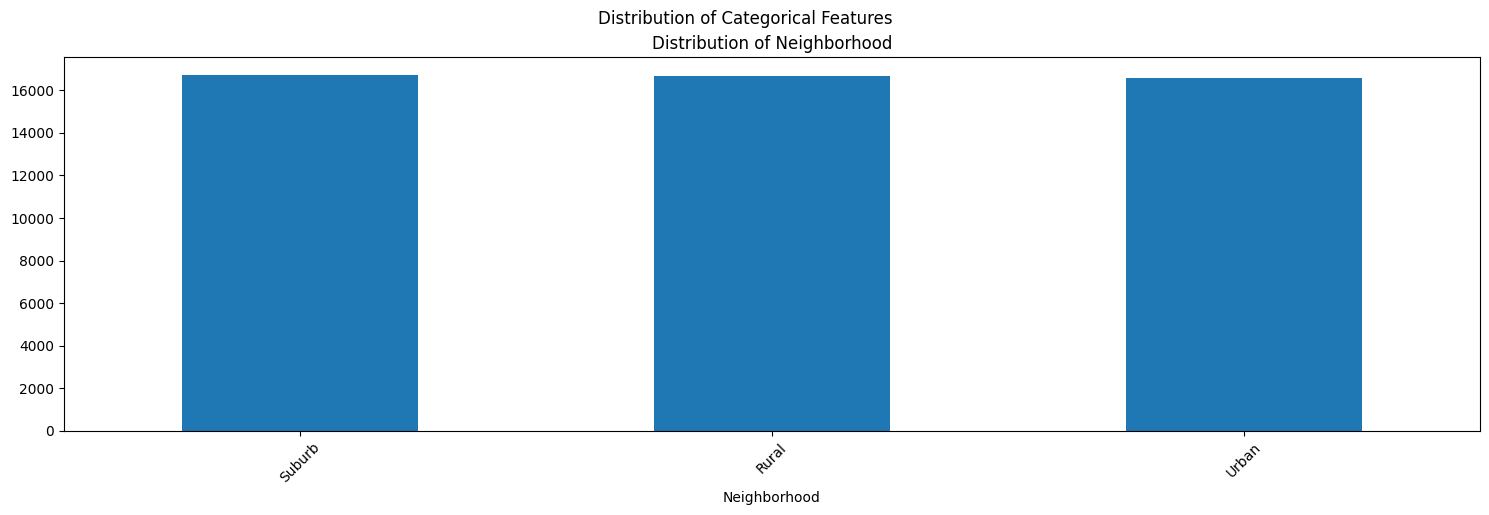

In [6]:
# Visualization 2: Categorical Features Distribution
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Distribution of Categorical Features', y=1.02)
plt.show()

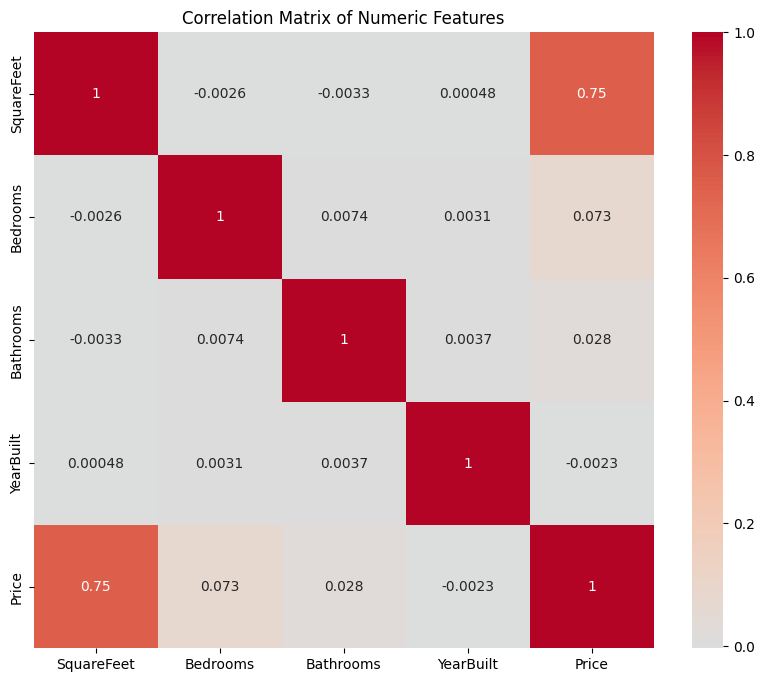

In [7]:
# Visualization 3: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

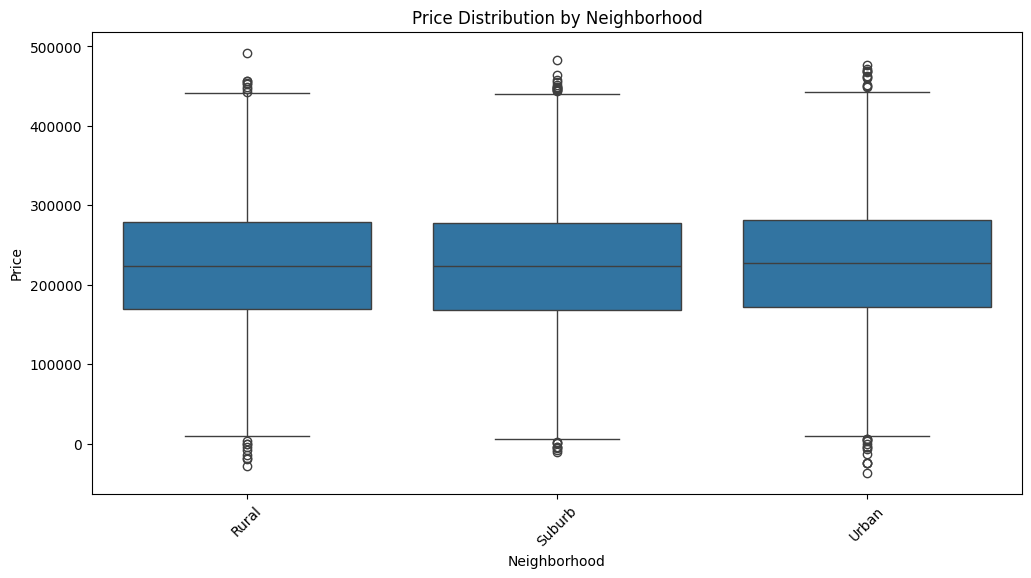

In [8]:
# Visualization 4: Price Distribution by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Price Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

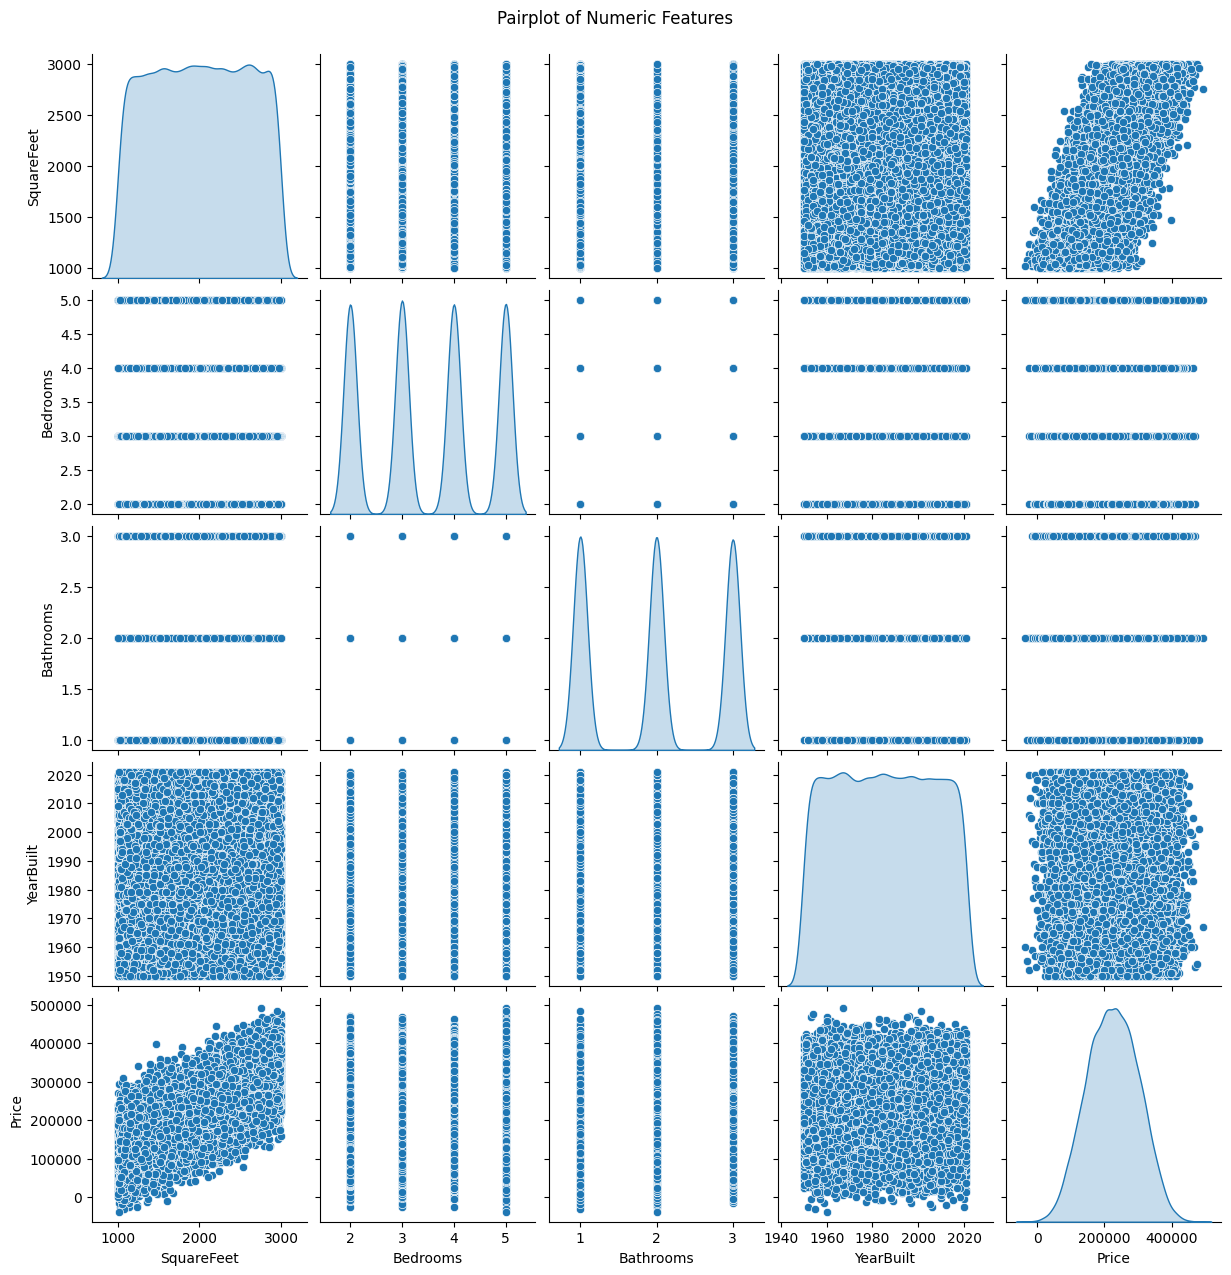

In [9]:
# Visualization 5: Pairplot of Numeric Features
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

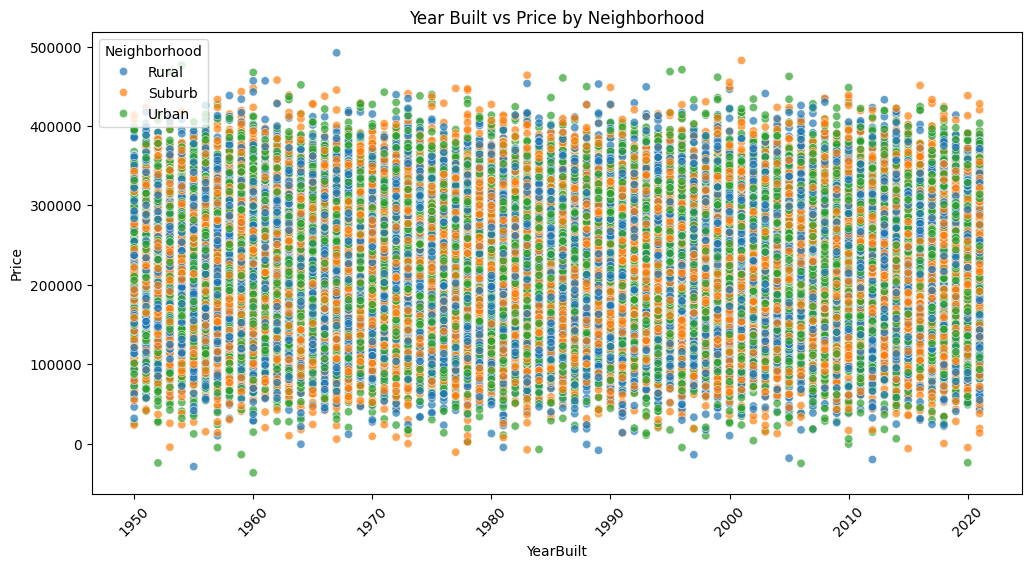

In [10]:
# Visualization 6: Year Built vs Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='Price', data=df, hue='Neighborhood', alpha=0.7)
plt.title('Year Built vs Price by Neighborhood')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Additional detailed information
print("\n6. Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(normalize=True).head())
    print("-"*40)


6. Unique Values in Categorical Columns:
Neighborhood: 3 unique values
Neighborhood
Suburb    0.33442
Rural     0.33352
Urban     0.33206
Name: proportion, dtype: float64
----------------------------------------


# Data Cleaning

In [12]:
# Re-confirm missing values
print("Missing Values Re-check:")
print(df.isnull().sum())

Missing Values Re-check:
SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [13]:
# Convert Neighborhood to categorical
df['Neighborhood'] = df['Neighborhood'].astype('category')

# Check updated data types
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
SquareFeet         int64
Bedrooms           int64
Bathrooms          int64
Neighborhood    category
YearBuilt          int64
Price            float64
dtype: object


In [14]:
# Check for duplicates
print("\nDuplicate Records:")
print(f"Total duplicates found: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

print(f"Dataset shape after removing duplicates: {df.shape}")


Duplicate Records:
Total duplicates found: 0
Dataset shape after removing duplicates: (50000, 6)


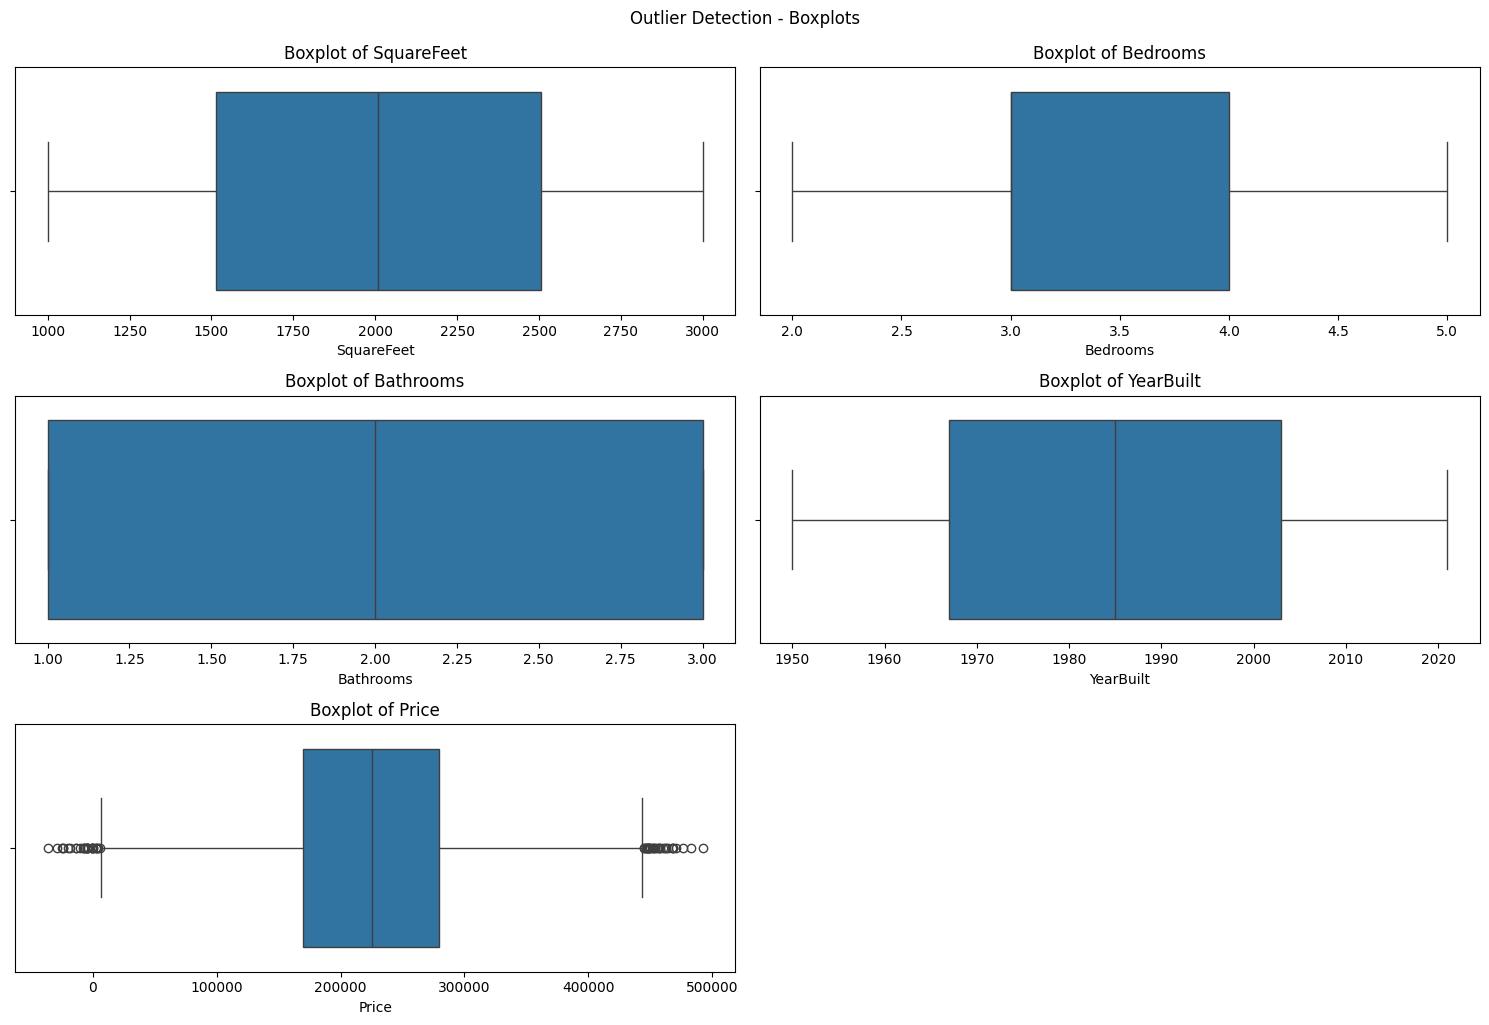

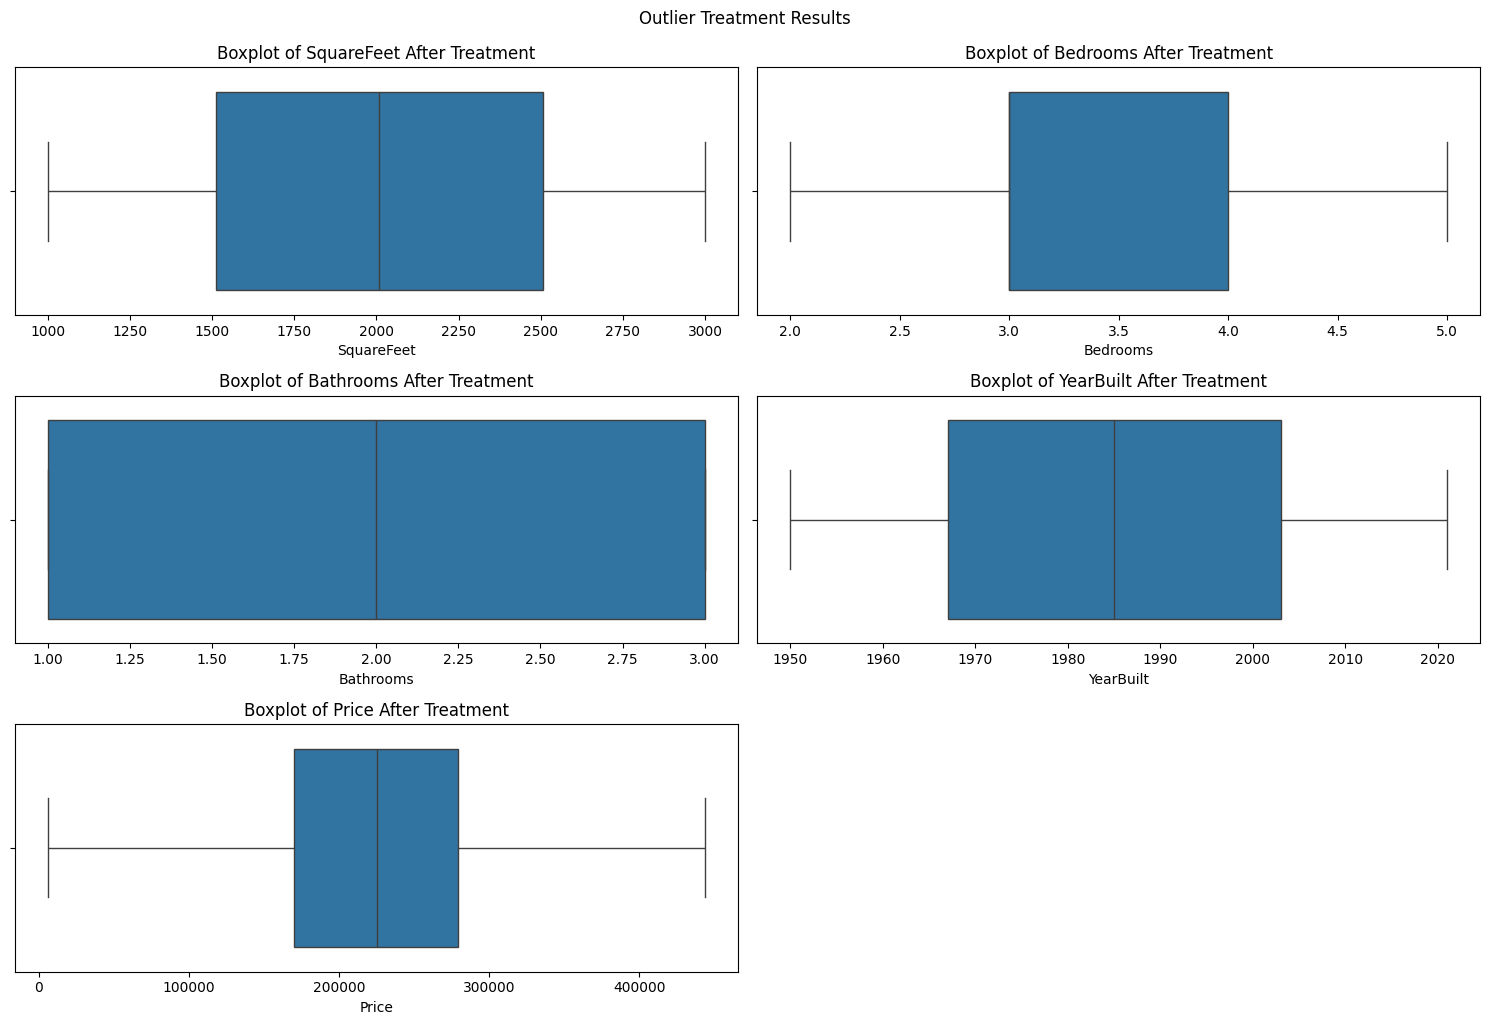

In [15]:
# Outlier detection visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.suptitle('Outlier Detection - Boxplots', y=1.02)
plt.show()

# Outlier treatment function using IQR
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Treat outliers for all numeric columns
for col in numeric_cols:
    df = treat_outliers(df, col)

# Visualize after outlier treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Treatment')
plt.tight_layout()
plt.suptitle('Outlier Treatment Results', y=1.02)
plt.show()

In [16]:
# Check Neighborhood categories
print("\nNeighborhood Categories:")
print(df['Neighborhood'].value_counts())

# Standardize neighborhood names (if needed)
# Example: df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

# Check for inconsistent numeric values
print("\nNumeric Value Ranges:")
print(df.describe().T[['min', 'max']])


Neighborhood Categories:
Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

Numeric Value Ranges:
                    min            max
SquareFeet  1000.000000    2999.000000
Bedrooms       2.000000       5.000000
Bathrooms      1.000000       3.000000
YearBuilt   1950.000000    2021.000000
Price       5829.205484  443500.284793


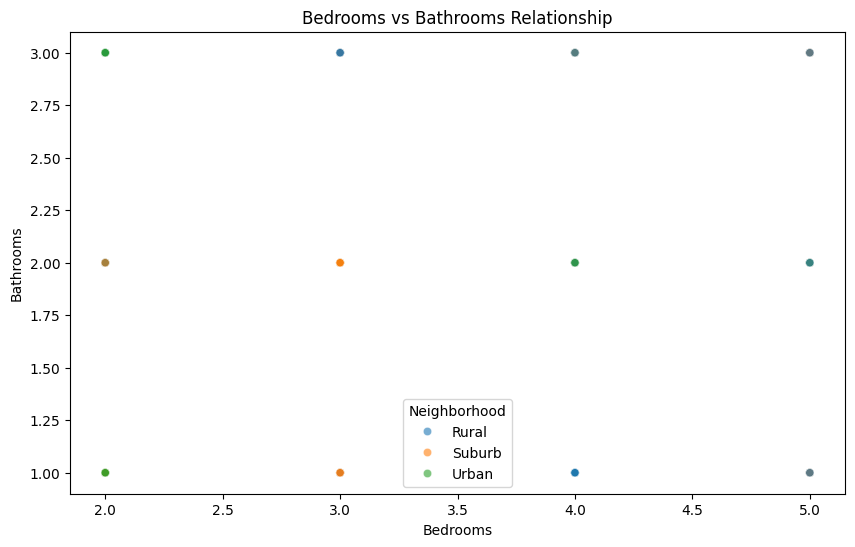


Impossible Value Checks:
Rows with 0 bedrooms: 0
Rows with 0 bathrooms: 0
Rows with negative price: 0
Rows with impossible year: 0


In [17]:
# Validate bedroom-bathroom ratio
df['BedBathRatio'] = df['Bedrooms'] / df['Bathrooms']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedrooms', y='Bathrooms', data=df, hue='Neighborhood', alpha=0.6)
plt.title('Bedrooms vs Bathrooms Relationship')
plt.show()

# Check for impossible values
print("\nImpossible Value Checks:")
print(f"Rows with 0 bedrooms: {df[df['Bedrooms'] == 0].shape[0]}")
print(f"Rows with 0 bathrooms: {df[df['Bathrooms'] == 0].shape[0]}")
print(f"Rows with negative price: {df[df['Price'] <= 0].shape[0]}")
print(f"Rows with impossible year: {df[df['YearBuilt'] < 1800].shape[0]}")

In [18]:
print("\nFinal Dataset Summary:")
print(f"Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
display(df.describe().T)


Final Dataset Summary:
Shape: (50000, 7)

Data Types:
SquareFeet       float64
Bedrooms         float64
Bathrooms        float64
Neighborhood    category
YearBuilt        float64
Price            float64
BedBathRatio     float64
dtype: object

Basic Statistics:


count          mean           std          min            25%  \
SquareFeet    50000.0    2006.37468    575.513241  1000.000000    1513.000000   
Bedrooms      50000.0       3.49870      1.116326     2.000000       3.000000   
Bathrooms     50000.0       1.99542      0.815851     1.000000       1.000000   
YearBuilt     50000.0    1985.40442     20.719377  1950.000000    1967.000000   
Price         50000.0  224827.10643  76090.390682  5829.205484  169955.860225   
BedBathRatio  50000.0       2.14055      1.241046     0.666667       1.333333   

                        50%            75%            max  
SquareFeet      2007.000000    2506.000000    2999.000000  
Bedrooms           3.000000       4.000000       5.000000  
Bathrooms          2.000000       3.000000       3.000000  
YearBuilt       1985.000000    2003.000000    2021.000000  
Price         225052.141166  279373.630052  443500.284793  
BedBathRatio       2.000000       3.000000       5.000000

# Univariate Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [22]:
# Set up visualization style
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)

In [24]:
# Numerical variables list
num_vars = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price', 'BedBathRatio']
cat_vars = ['Neighborhood']

# Create summary statistics table
summary_stats = df[num_vars].describe().T
summary_stats['skewness'] = df[num_vars].skew()
summary_stats['kurtosis'] = df[num_vars].kurtosis()

print("\nSummary Statistics:")
display(summary_stats)


Summary Statistics:


count          mean           std          min            25%  \
SquareFeet    50000.0    2006.37468    575.513241  1000.000000    1513.000000   
Bedrooms      50000.0       3.49870      1.116326     2.000000       3.000000   
Bathrooms     50000.0       1.99542      0.815851     1.000000       1.000000   
YearBuilt     50000.0    1985.40442     20.719377  1950.000000    1967.000000   
Price         50000.0  224827.10643  76090.390682  5829.205484  169955.860225   
BedBathRatio  50000.0       2.14055      1.241046     0.666667       1.333333   

                        50%            75%            max  skewness  kurtosis  
SquareFeet      2007.000000    2506.000000    2999.000000 -0.011162 -1.189926  
Bedrooms           3.000000       4.000000       5.000000  0.004640 -1.356057  
Bathrooms          2.000000       3.000000       3.000000  0.008408 -1.497577  
YearBuilt       1985.000000    2003.000000    2021.000000  0.005557 -1.196839  
Price         225052.141166  279373.630052  443500.284793 -0.008346 -0.425935  
BedBathRatio       2.000000       3.000000       5.000000  1.017412  0.075287


Analysis for SquareFeet:


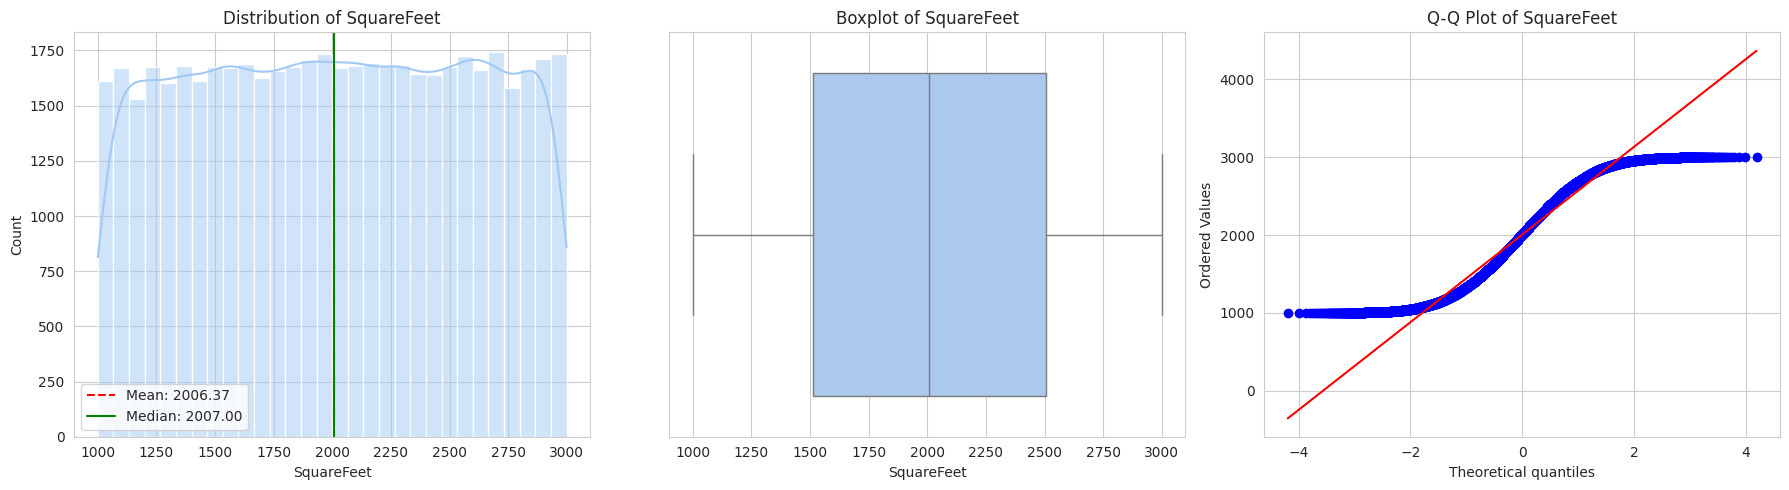

Skewness: -0.0112 (approximately symmetric)
Kurtosis: -1.1899
--------------------------------------------------

Analysis for Bedrooms:


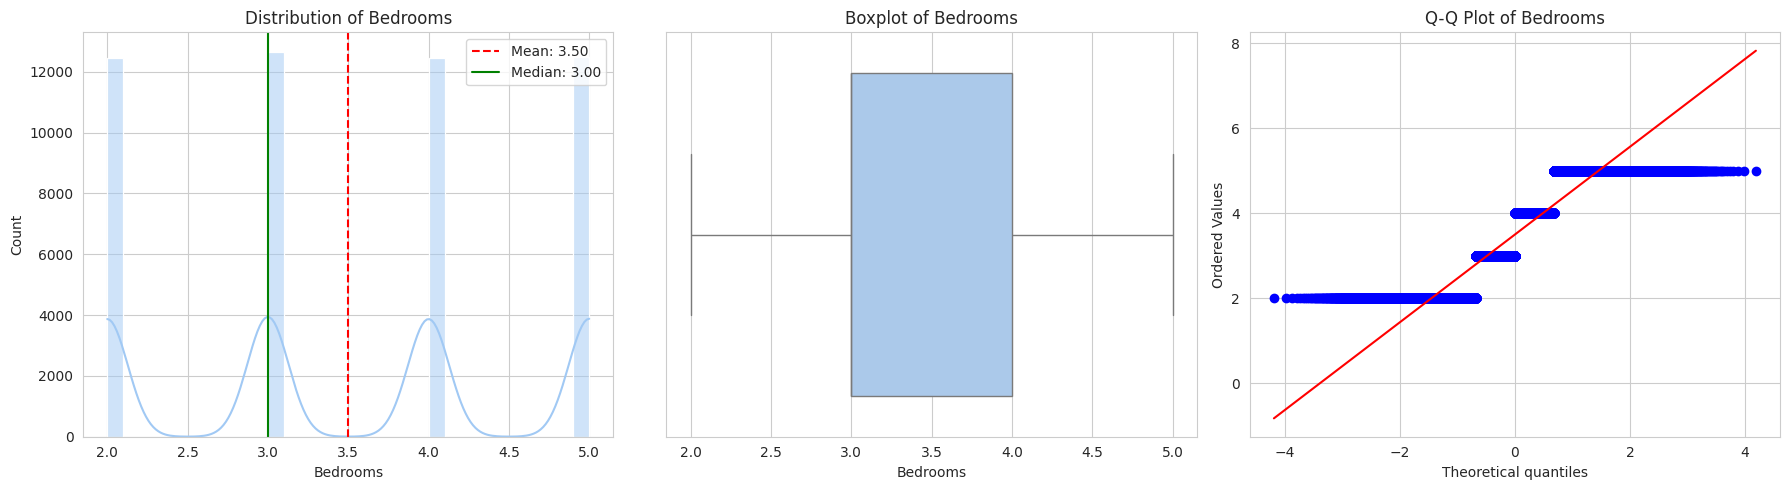

Skewness: 0.0046 (approximately symmetric)
Kurtosis: -1.3561
--------------------------------------------------

Analysis for Bathrooms:


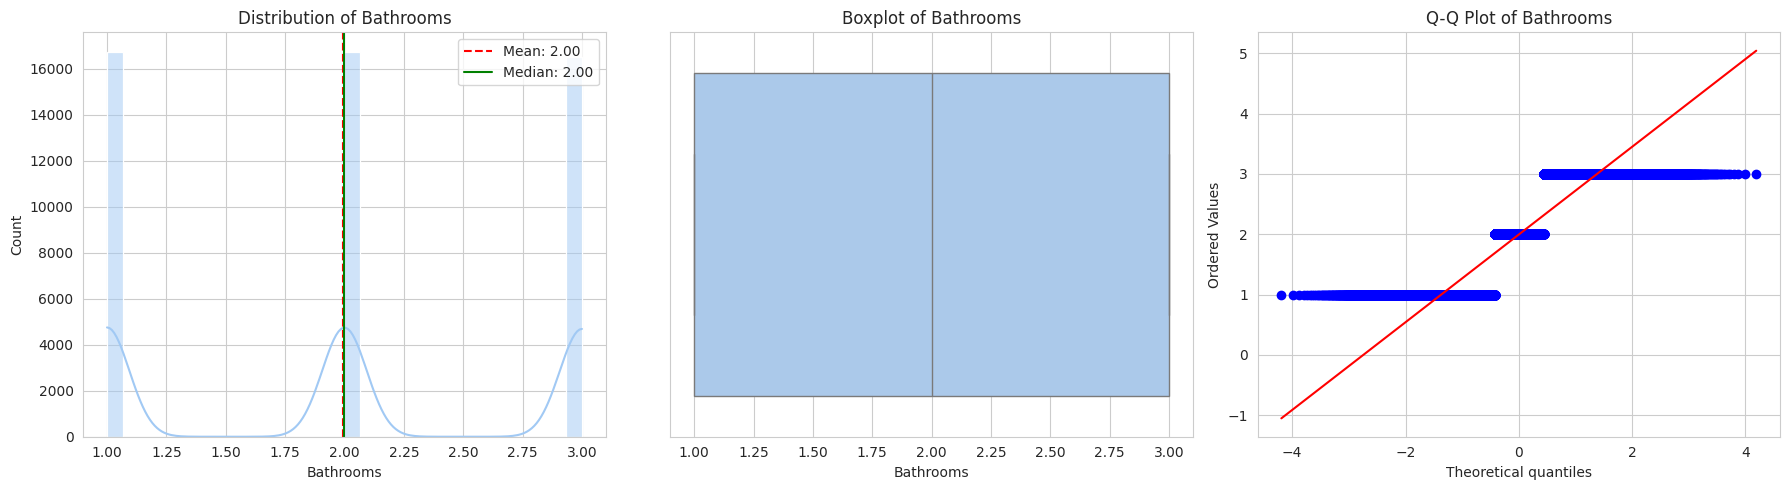

Skewness: 0.0084 (approximately symmetric)
Kurtosis: -1.4976
--------------------------------------------------

Analysis for YearBuilt:


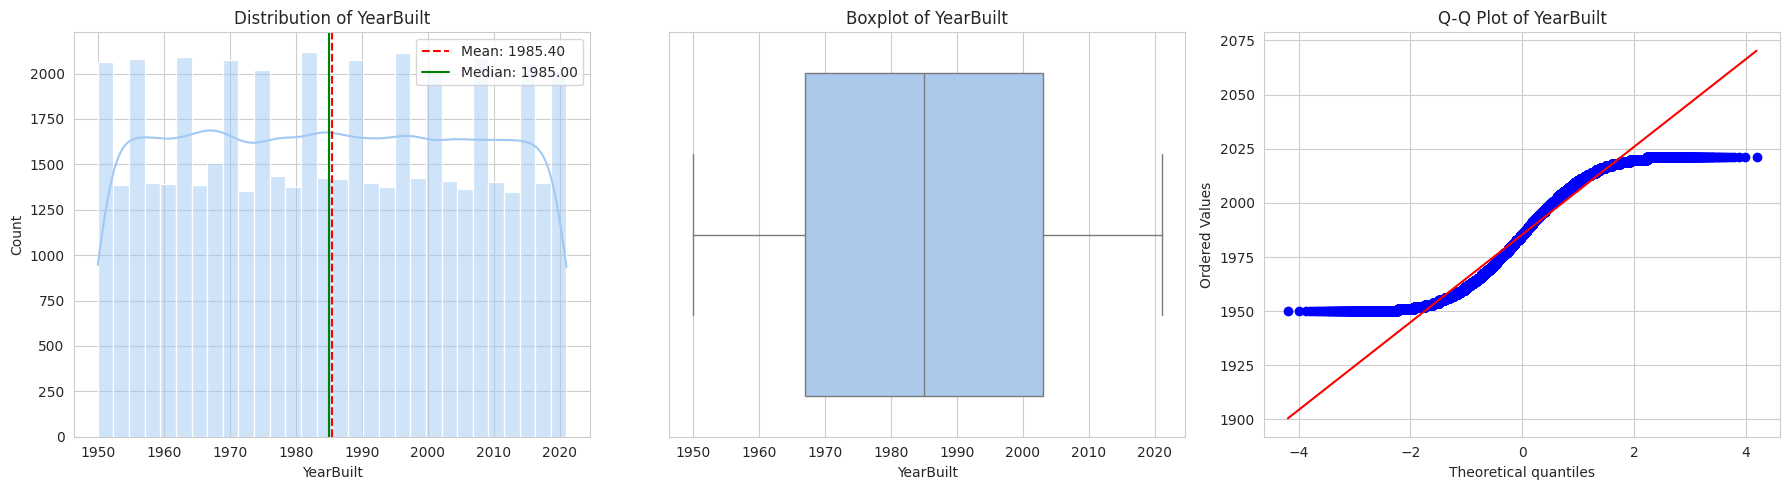

Skewness: 0.0056 (approximately symmetric)
Kurtosis: -1.1968
--------------------------------------------------

Analysis for Price:


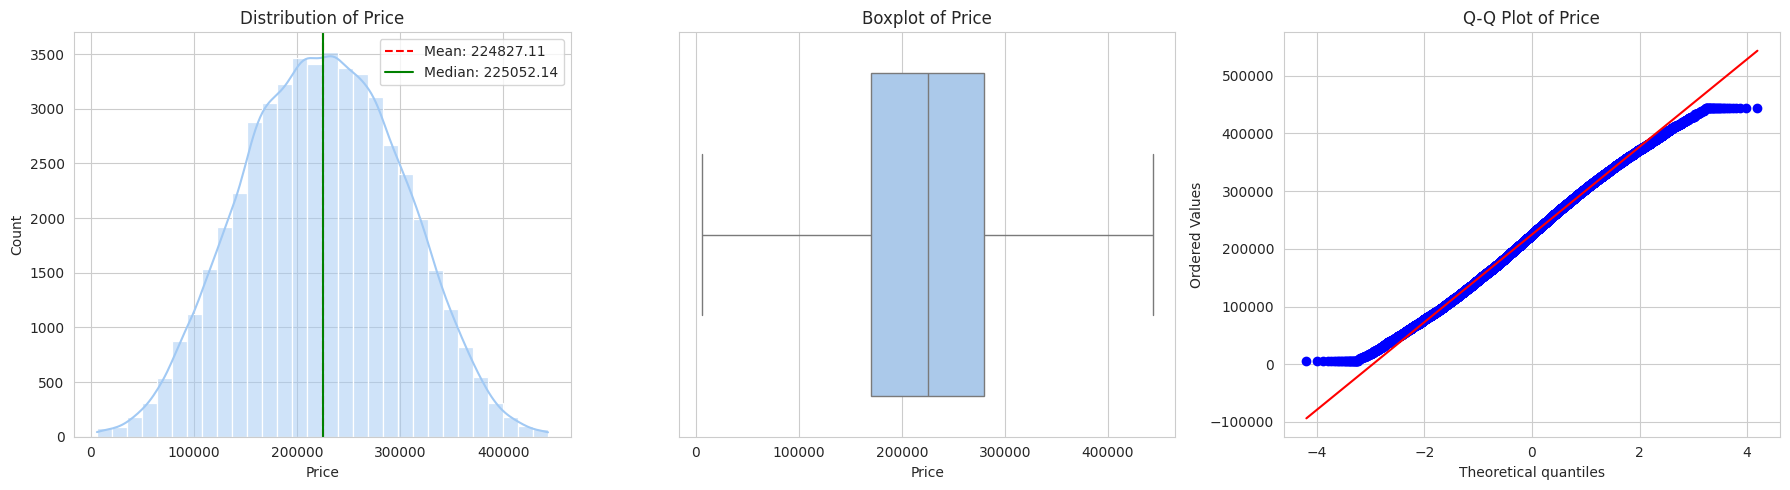

Skewness: -0.0083 (approximately symmetric)
Kurtosis: -0.4259
--------------------------------------------------

Analysis for BedBathRatio:


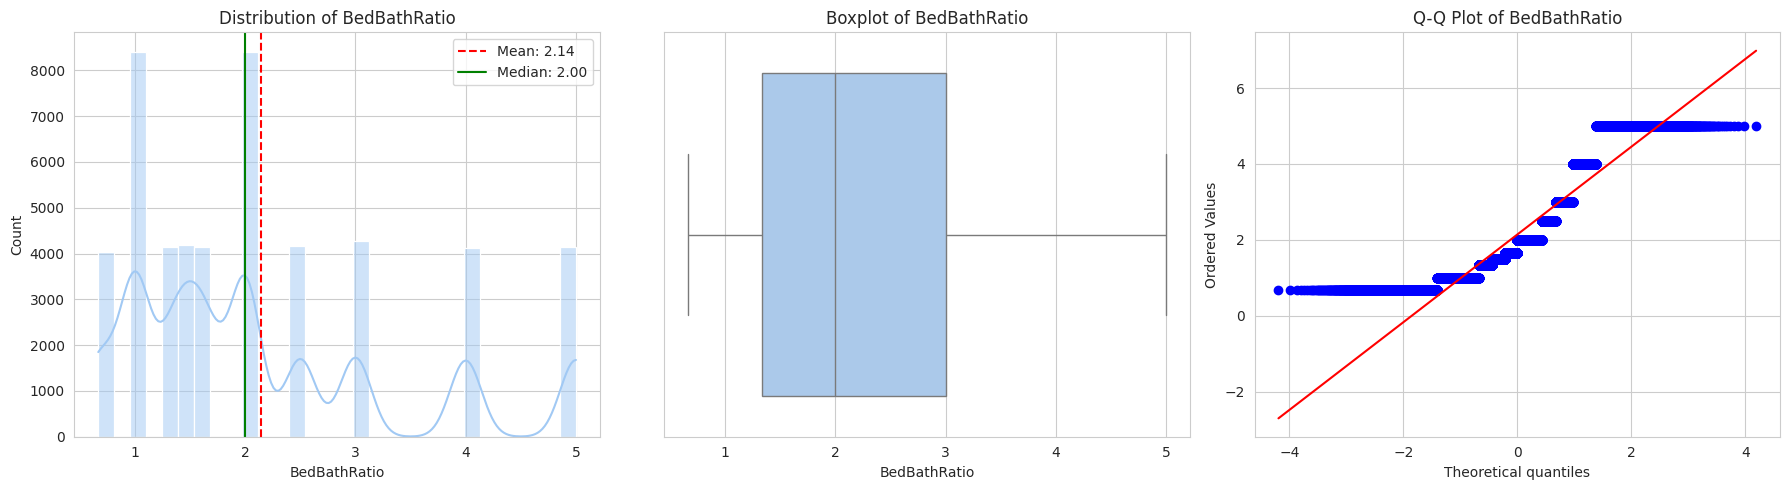

Skewness: 1.0174 (highly skewed)
Kurtosis: 0.0753
--------------------------------------------------


In [25]:
# Visualization for each numerical variable
for var in num_vars:
    print(f"\nAnalysis for {var}:")

    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogram
    sns.histplot(df[var], kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Distribution of {var}')
    axes[0].axvline(df[var].mean(), color='r', linestyle='--', label=f'Mean: {df[var].mean():.2f}')
    axes[0].axvline(df[var].median(), color='g', linestyle='-', label=f'Median: {df[var].median():.2f}')
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[1])
    axes[1].set_title(f'Boxplot of {var}')

    # Q-Q plot
    stats.probplot(df[var], dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {var}')

    plt.tight_layout()
    plt.show()

    # Skewness interpretation
    skew_val = df[var].skew()
    if abs(skew_val) < 0.5:
        skew_type = "approximately symmetric"
    elif 0.5 <= abs(skew_val) < 1:
        skew_type = "moderately skewed"
    else:
        skew_type = "highly skewed"

    print(f"Skewness: {skew_val:.4f} ({skew_type})")
    print(f"Kurtosis: {df[var].kurtosis():.4f}")
    print("-"*50)


Categorical Variables Analysis

Analysis for Neighborhood:

Frequency Table:


Count Percentage
Neighborhood                  
Suburb        16721      33.4%
Rural         16676      33.4%
Urban         16603      33.2%

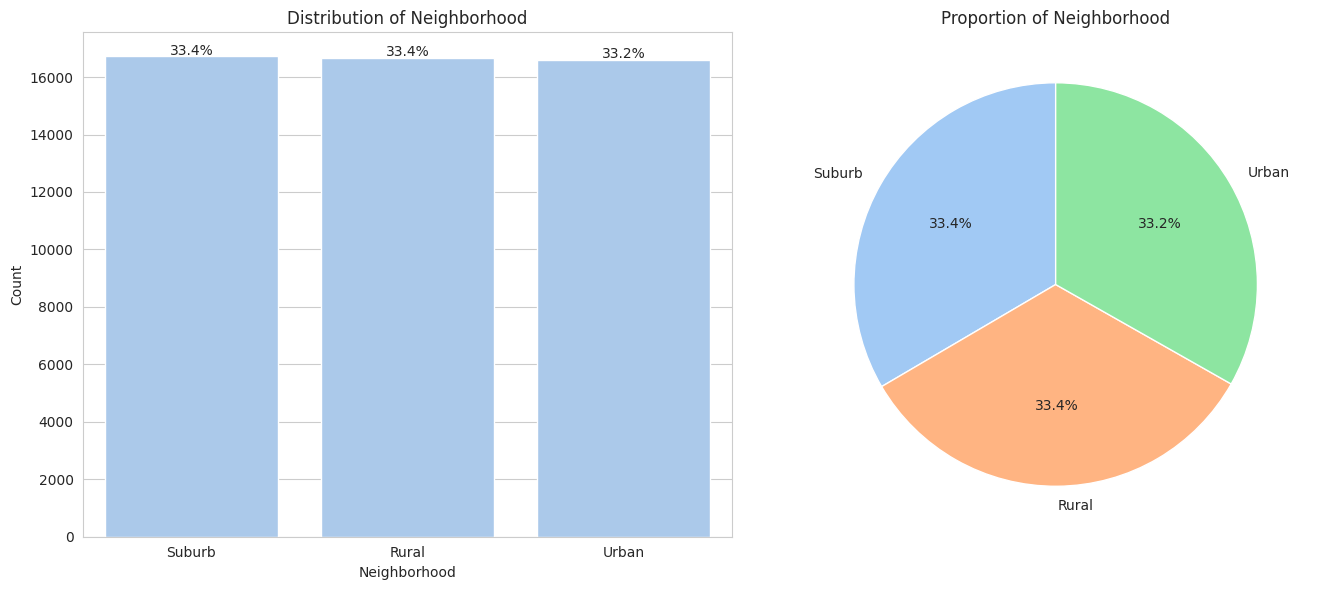

In [26]:
## 2. Categorical Variables Analysis
print("\n" + "="*50)
print("Categorical Variables Analysis")
print("="*50)

for var in cat_vars:
    print(f"\nAnalysis for {var}:")

    # Frequency table
    freq_table = df[var].value_counts()
    relative_freq = df[var].value_counts(normalize=True)

    print("\nFrequency Table:")
    display(pd.DataFrame({
        'Count': freq_table,
        'Percentage': relative_freq.apply(lambda x: f"{x*100:.1f}%")
    }))

    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart
    sns.countplot(x=var, data=df, ax=axes[0], order=freq_table.index)
    axes[0].set_title(f'Distribution of {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Count')

    # Add percentage labels
    total = len(df[var])
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].text(p.get_x() + p.get_width()/2., height + 50,
                f'{height/total*100:.1f}%', ha='center')

    # Pie chart
    freq_table.plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=90)
    axes[1].set_title(f'Proportion of {var}')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


Target Variable (Price) Deep Analysis


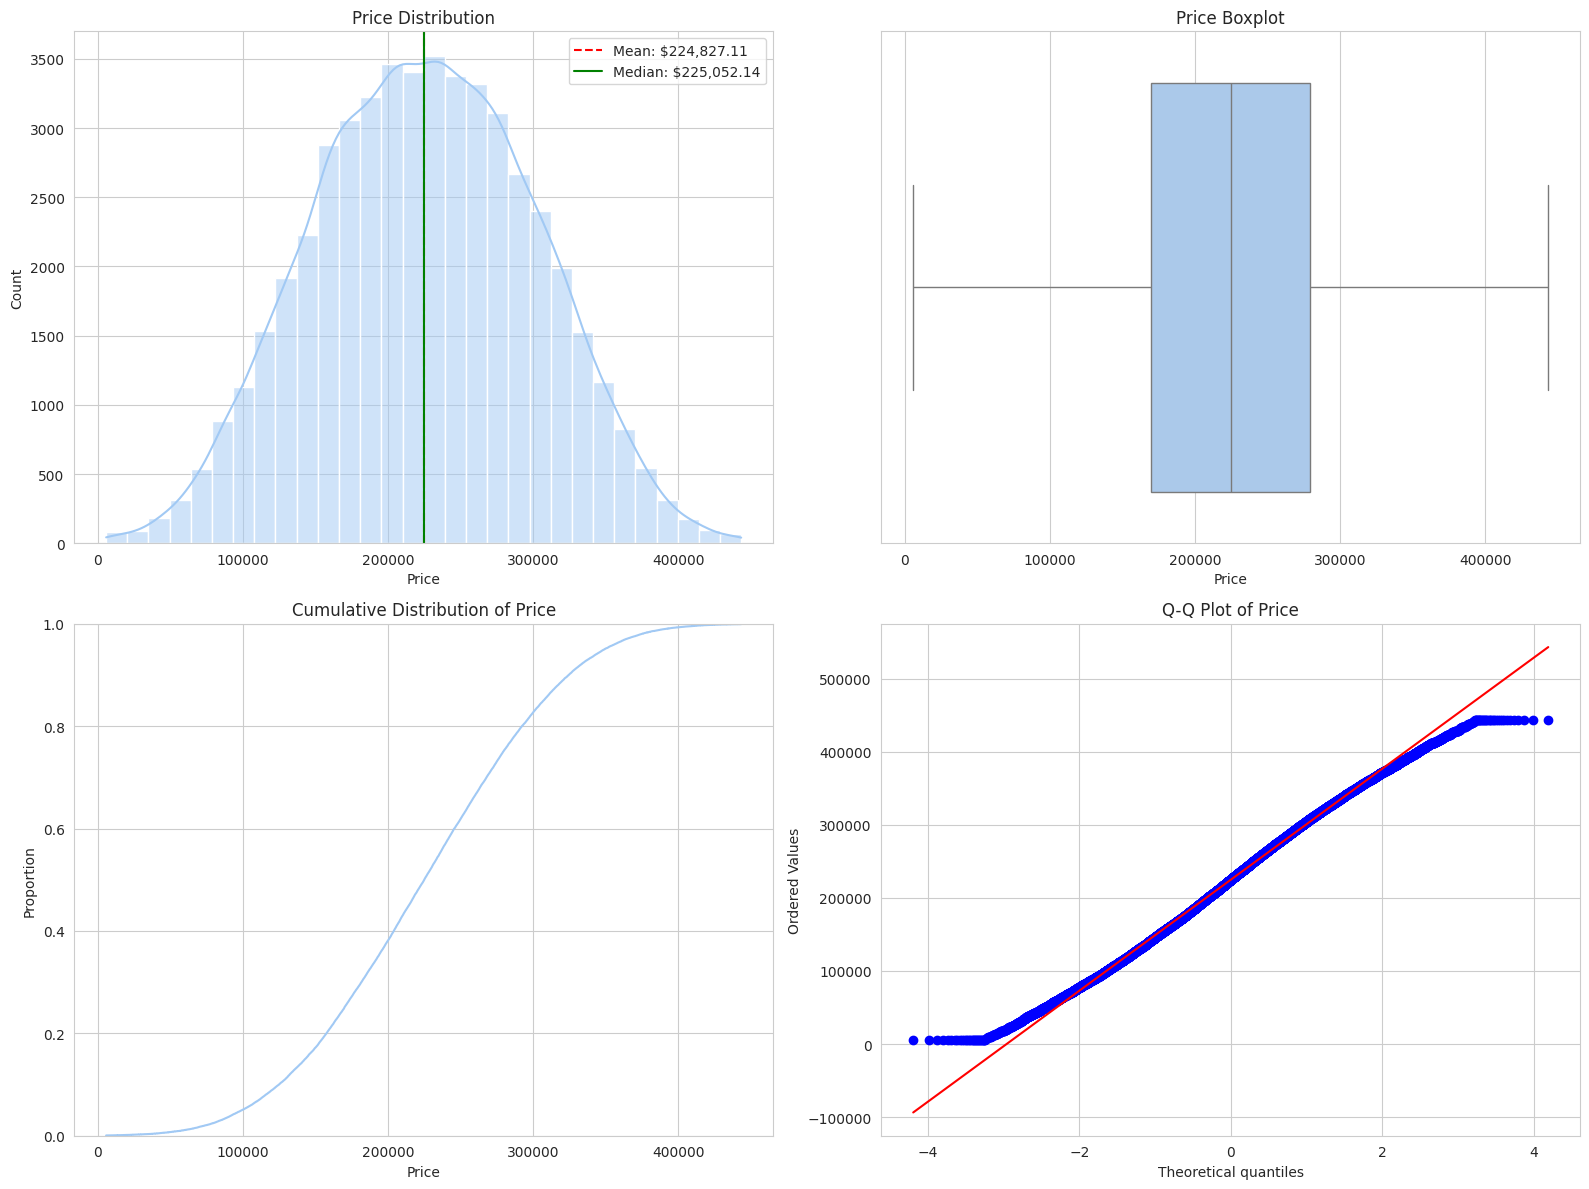

Skewness: -0.0083
Kurtosis: -0.4259
Price Range: $5,829.21 to $443,500.28
Interquartile Range (IQR): $109,417.77


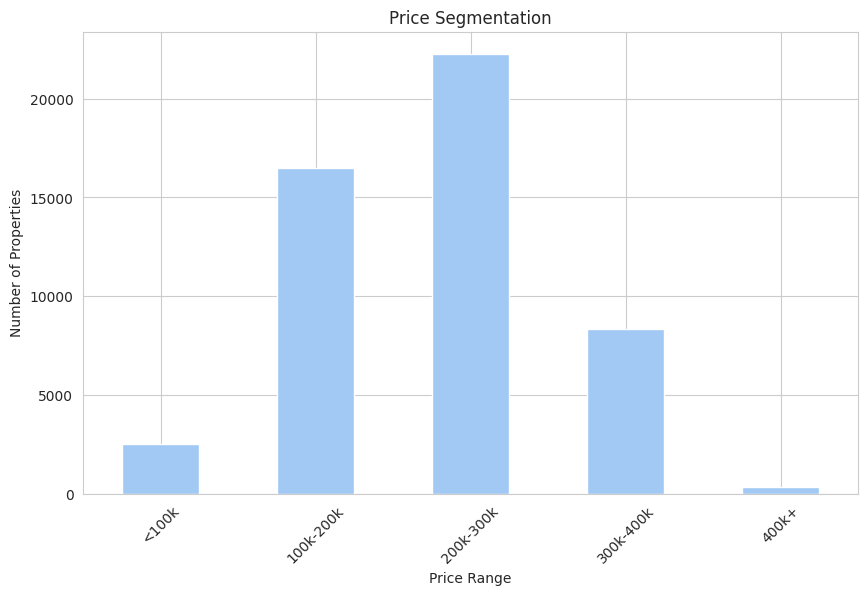


Price Segmentation Distribution:


Price
<100k         2538
100k-200k    16508
200k-300k    22283
300k-400k     8332
400k+          339
Name: count, dtype: int64

In [27]:
## 3. Target Variable (Price) Deep Dive
print("\n" + "="*50)
print("Target Variable (Price) Deep Analysis")
print("="*50)

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram with KDE
sns.histplot(df['Price'], kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Price Distribution')
axes[0, 0].axvline(df['Price'].mean(), color='r', linestyle='--', label=f'Mean: ${df["Price"].mean():,.2f}')
axes[0, 0].axvline(df['Price'].median(), color='g', linestyle='-', label=f'Median: ${df["Price"].median():,.2f}')
axes[0, 0].legend()

# Boxplot
sns.boxplot(x=df['Price'], ax=axes[0, 1])
axes[0, 1].set_title('Price Boxplot')

# Cumulative distribution
sns.ecdfplot(df['Price'], ax=axes[1, 0])
axes[1, 0].set_title('Cumulative Distribution of Price')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].grid(True)

# Q-Q plot
stats.probplot(df['Price'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Price')

plt.tight_layout()
plt.show()

# Price distribution metrics
price_skew = df['Price'].skew()
price_kurtosis = df['Price'].kurtosis()

print(f"Skewness: {price_skew:.4f}")
print(f"Kurtosis: {price_kurtosis:.4f}")
print(f"Price Range: ${df['Price'].min():,.2f} to ${df['Price'].max():,.2f}")
print(f"Interquartile Range (IQR): ${df['Price'].quantile(0.75) - df['Price'].quantile(0.25):,.2f}")

# Price segmentation analysis
bins = [0, 100000, 200000, 300000, 400000, 500000]
labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k+']
price_segments = pd.cut(df['Price'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
price_segments.value_counts().sort_index().plot(kind='bar')
plt.title('Price Segmentation')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

print("\nPrice Segmentation Distribution:")
display(price_segments.value_counts().sort_index())

# Bivariate and Multivariate Analysis

In [28]:
sns.set_style("whitegrid")
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

In [29]:
# Define variables
num_vars = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price', 'BedBathRatio']
cat_vars = ['Neighborhood']
target_var = 'Price'


Correlation Analysis:


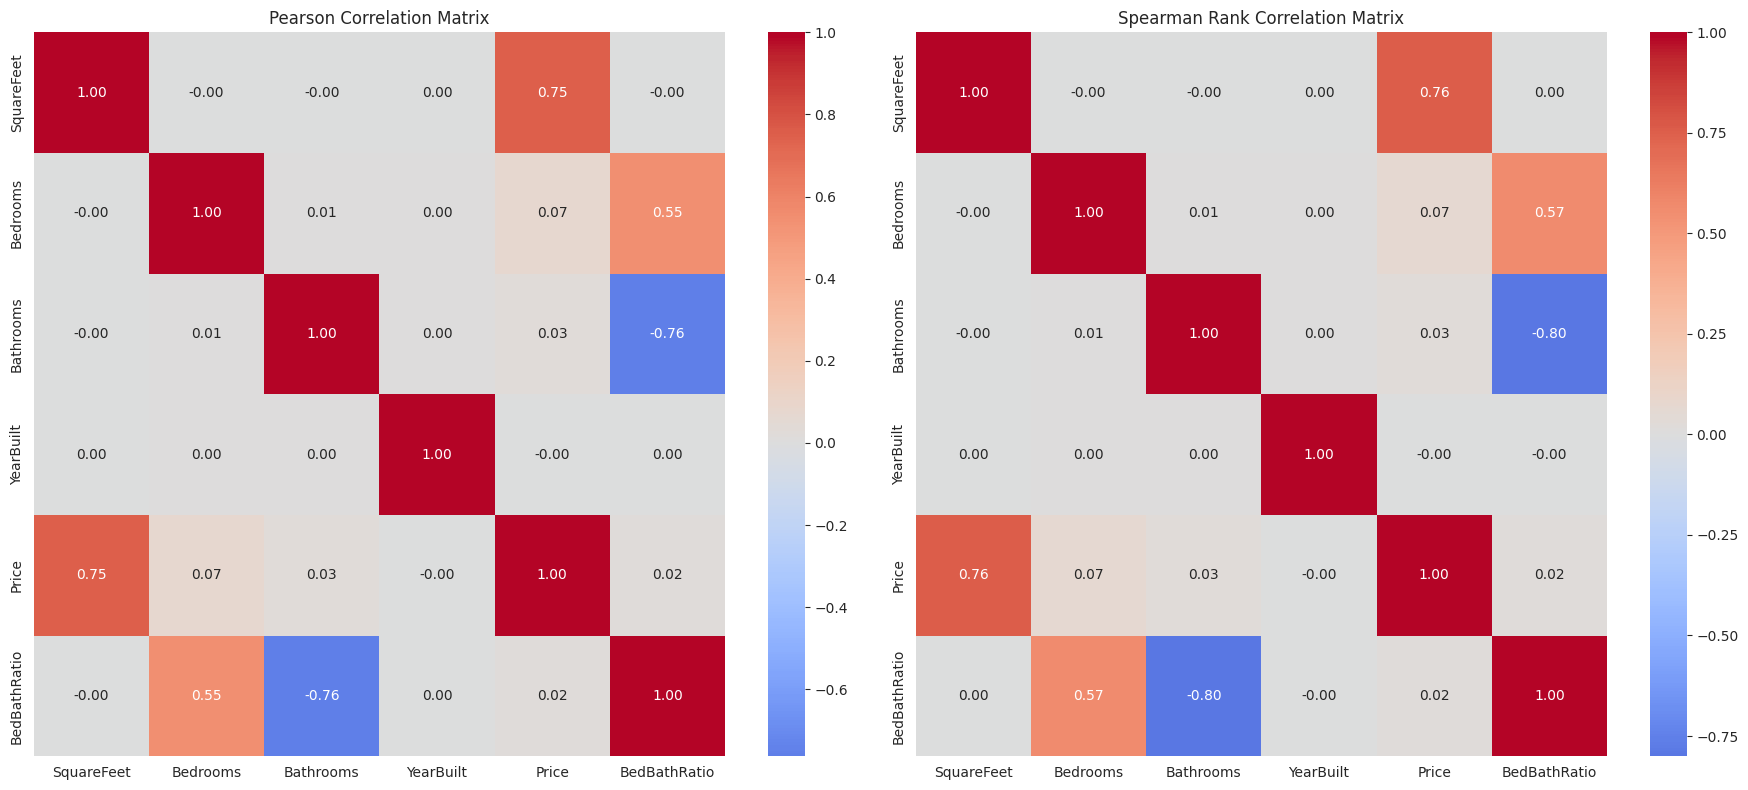

In [30]:
## 1. Numerical vs. Numerical Analysis

# Correlation matrices
print("\nCorrelation Analysis:")
pearson_corr = df[num_vars].corr(method='pearson')
spearman_corr = df[num_vars].corr(method='spearman')

# Visualize correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Pearson Correlation Matrix')

sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Spearman Rank Correlation Matrix')

plt.tight_layout()
plt.show()

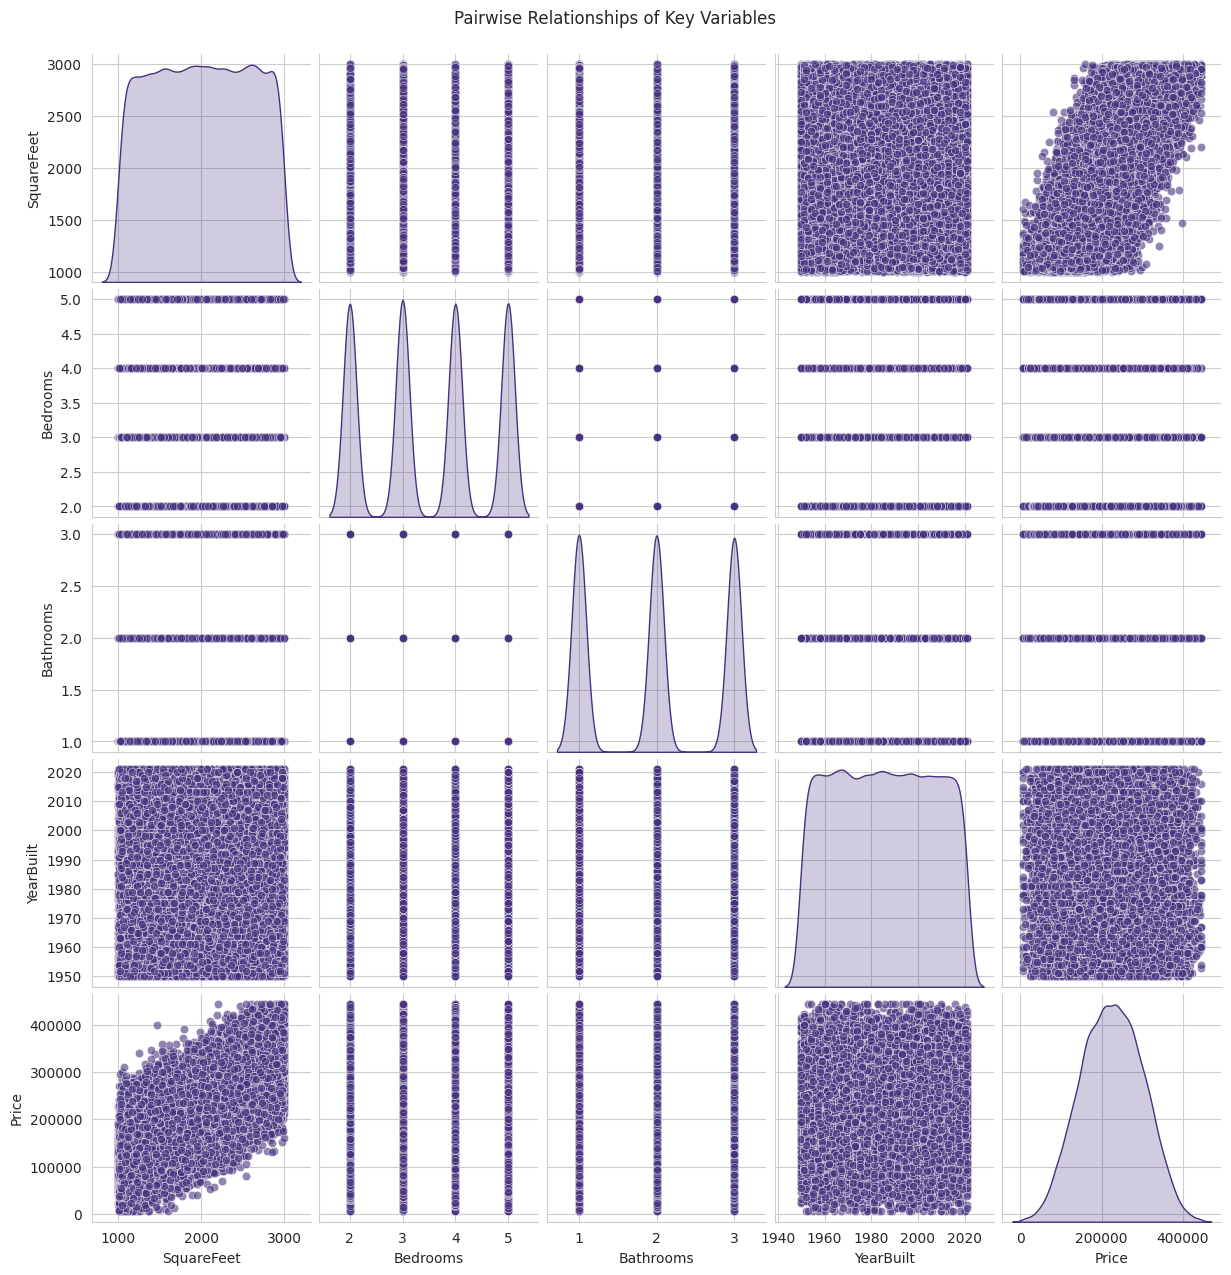


Top Correlations with Price:
SquareFeet    0.750885
Bedrooms      0.072638
Bathrooms     0.028402
Name: Price, dtype: float64


In [31]:
# Pairplot for key variables
key_vars = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']
sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Key Variables', y=1.02)
plt.show()

# Scatterplots for strongest correlations
strong_correlations = pearson_corr['Price'].sort_values(ascending=False)[1:4]  # Top 3 excluding itself

print("\nTop Correlations with Price:")
print(strong_correlations)

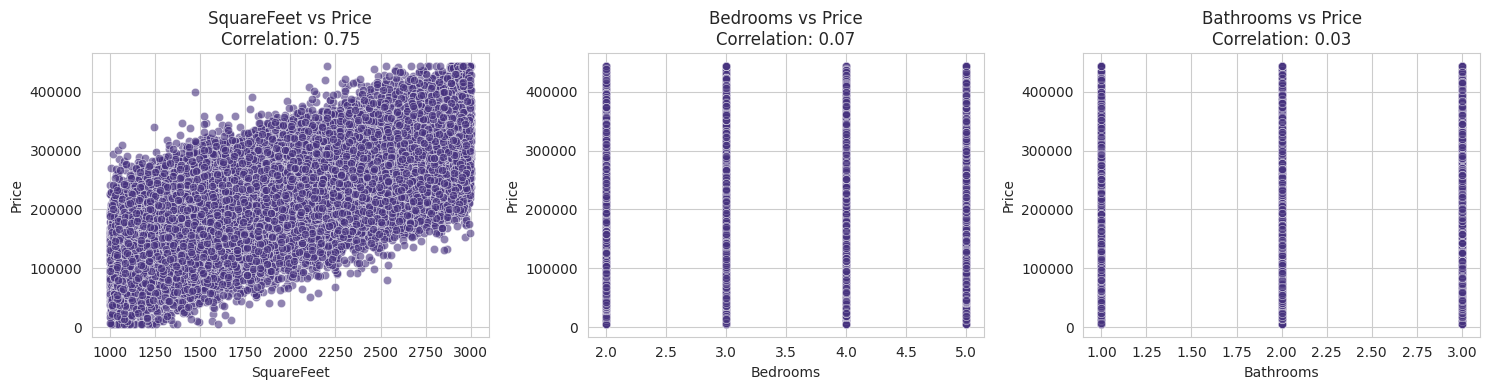

In [32]:
# Create scatterplots for top correlations
plt.figure(figsize=(15, 4))
for i, (feature, corr_value) in enumerate(strong_correlations.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y='Price', data=df, alpha=0.6)
    plt.title(f'{feature} vs Price\nCorrelation: {corr_value:.2f}')
plt.tight_layout()
plt.show()


Analysis for Neighborhood vs Numerical Variables:

Summary Statistics by Neighborhood:


/tmp/ipython-input-35-539615675.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(cat_var)[num_vars].agg(['mean', 'median', 'std', 'count'])


Neighborhood                 Rural         Suburb          Urban
SquareFeet   mean      2001.621132    2000.151127    2017.416913
             median    2006.000000    1992.000000    2026.000000
             std        577.115928     574.894261     574.398346
             count    16676.000000   16721.000000   16603.000000
Bedrooms     mean         3.506836       3.493930       3.495332
             median       4.000000       3.000000       3.000000
             std          1.116168       1.112393       1.120453
             count    16676.000000   16721.000000   16603.000000
Bathrooms    mean         1.991185       2.000658       1.994399
             median       2.000000       2.000000       2.000000
             std          0.814549       0.815042       0.817988
             count    16676.000000   16721.000000   16603.000000
YearBuilt    mean      1985.353262    1985.515280    1985.344155
             median    1985.000000    1985.000000    1985.000000
             std         20.725718      20.689485      20.743872
             count    16676.000000   16721.000000   16603.000000
Price        mean    224098.561321  223231.723897  227165.575957
             median  223743.203722  223625.921873  227879.871010
             std      76003.476960   76228.586895   75986.559847
             count    16676.000000   16721.000000   16603.000000
BedBathRatio mean         2.152734       2.130764       2.138168
             median       2.000000       2.000000       2.000000
             std          1.251251       1.234858       1.236938
             count    16676.000000   16721.000000   16603.000000

/tmp/ipython-input-35-539615675.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby(cat_var)['Price'].mean()


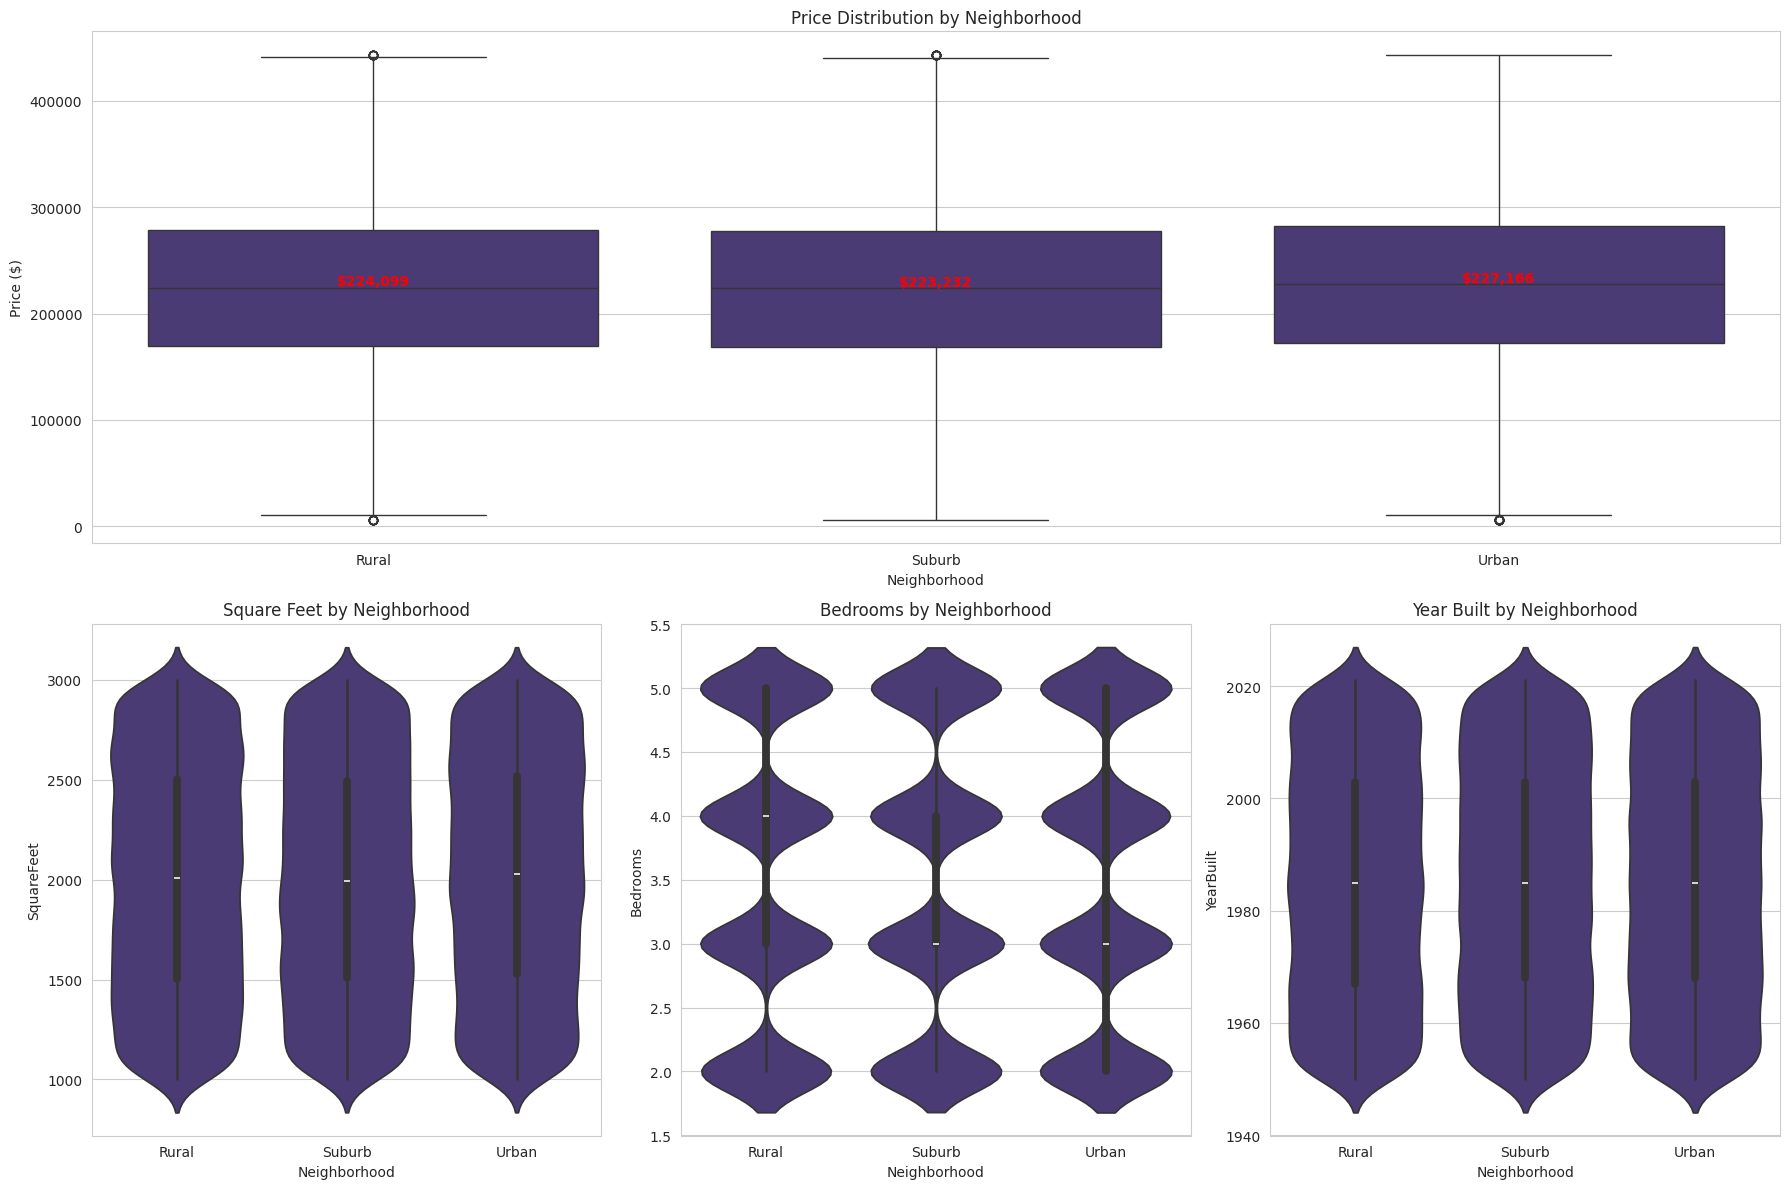

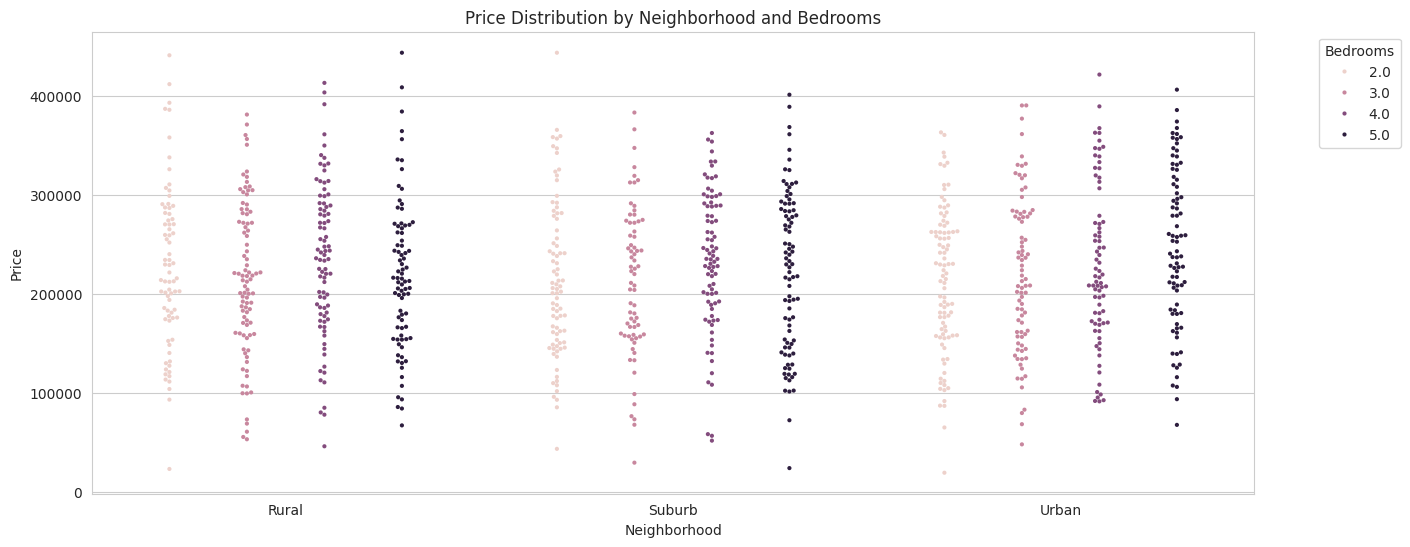

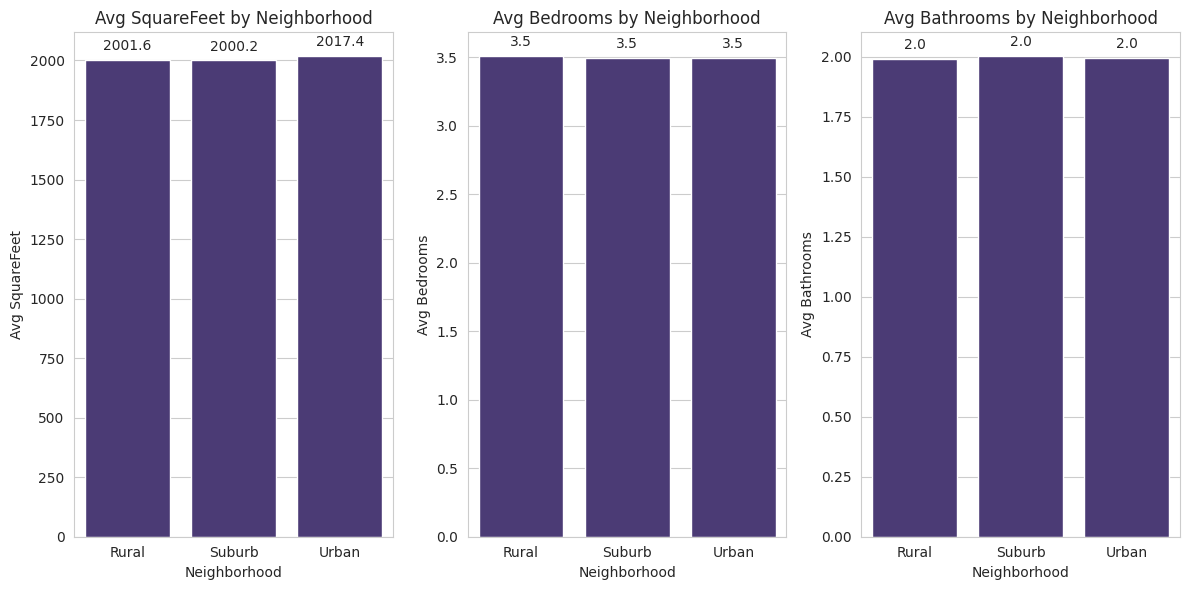

In [35]:
## 2. Categorical vs. Numerical Analysis
import matplotlib.gridspec as gridspec

for cat_var in cat_vars:
    print(f"\nAnalysis for {cat_var} vs Numerical Variables:")

    # Grouped statistics
    grouped_stats = df.groupby(cat_var)[num_vars].agg(['mean', 'median', 'std', 'count'])
    print(f"\nSummary Statistics by {cat_var}:")
    display(grouped_stats.T)

    # Create a comprehensive visualization grid
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 3, figure=fig)

    # Price distribution by category
    ax1 = fig.add_subplot(gs[0, :])
    sns.boxplot(x=cat_var, y='Price', data=df, ax=ax1)
    ax1.set_title(f'Price Distribution by {cat_var}')
    ax1.set_xlabel(cat_var)
    ax1.set_ylabel('Price ($)')

    # Add mean markers
    means = df.groupby(cat_var)['Price'].mean()
    for i, mean_val in enumerate(means):
        ax1.text(i, mean_val, f'${mean_val:,.0f}',
                ha='center', va='bottom', fontweight='bold', color='red')

    # Violin plots for key numerical features
    ax2 = fig.add_subplot(gs[1, 0])
    sns.violinplot(x=cat_var, y='SquareFeet', data=df, ax=ax2)
    ax2.set_title('Square Feet by Neighborhood')

    ax3 = fig.add_subplot(gs[1, 1])
    sns.violinplot(x=cat_var, y='Bedrooms', data=df, ax=ax3)
    ax3.set_title('Bedrooms by Neighborhood')

    ax4 = fig.add_subplot(gs[1, 2])
    sns.violinplot(x=cat_var, y='YearBuilt', data=df, ax=ax4)
    ax4.set_title('Year Built by Neighborhood')

    plt.tight_layout()
    plt.show()

    # Swarm plots for detailed distribution (sample for better performance)
    sample_df = df.sample(1000) if len(df) > 5000 else df
    plt.figure(figsize=(15, 6))
    sns.swarmplot(x=cat_var, y='Price', data=sample_df, hue='Bedrooms', size=3, dodge=True)
    plt.title(f'Price Distribution by {cat_var} and Bedrooms')
    plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Bar plot of average values
    plt.figure(figsize=(12, 6))
    for i, num_var in enumerate(['SquareFeet', 'Bedrooms', 'Bathrooms'], 1):
        plt.subplot(1, 3, i)
        sns.barplot(x=cat_var, y=num_var, data=df, estimator=np.mean, errorbar=None)
        plt.title(f'Avg {num_var} by {cat_var}')
        plt.ylabel(f'Avg {num_var}')

        # Add value labels
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.1f}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')
    plt.tight_layout()
    plt.show()


Relationship between Neighborhood and Bedroom_Cat:

Cross-tabulation (% within Neighborhood):



Chi-square test results:
Chi2 = 5.23, p-value = 0.5146, Degrees of Freedom = 6
Significant relationship: No


<Figure size 1000x600 with 0 Axes>

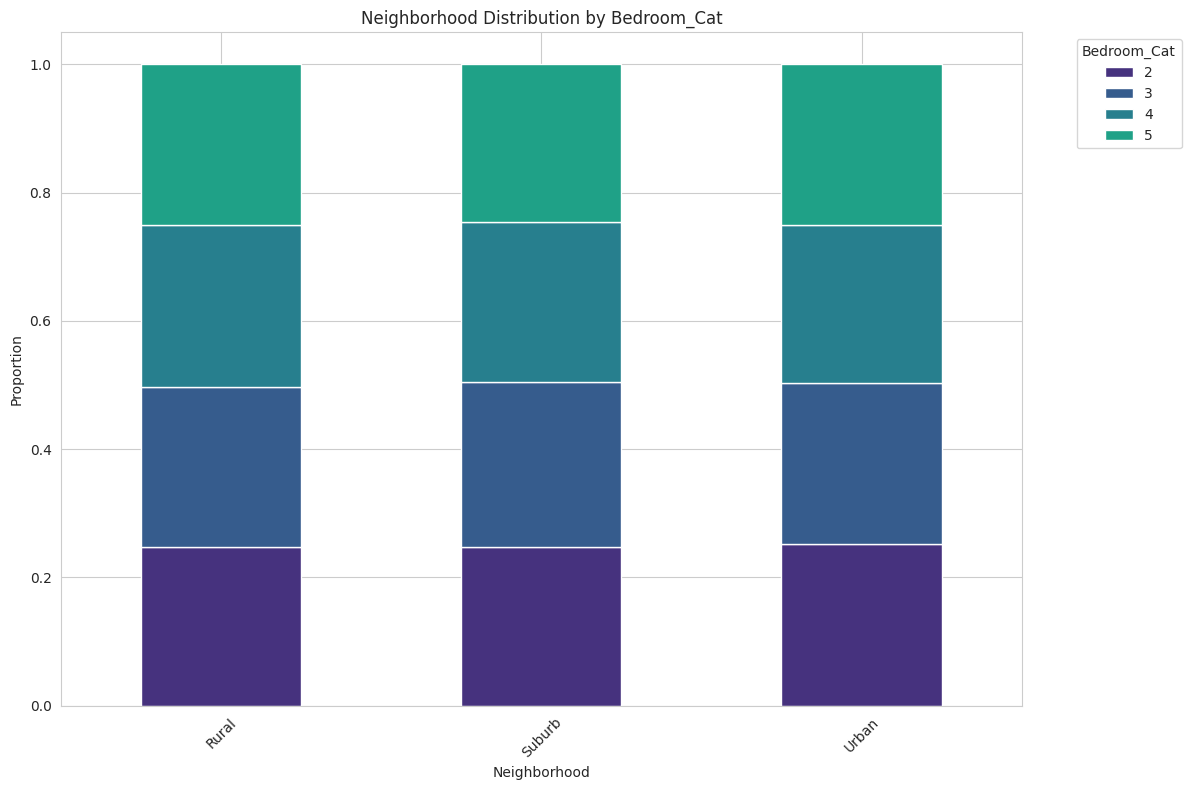


Relationship between Neighborhood and Bathroom_Cat:

Cross-tabulation (% within Neighborhood):



Chi-square test results:
Chi2 = 2.53, p-value = 0.6387, Degrees of Freedom = 4
Significant relationship: No


<Figure size 1000x600 with 0 Axes>

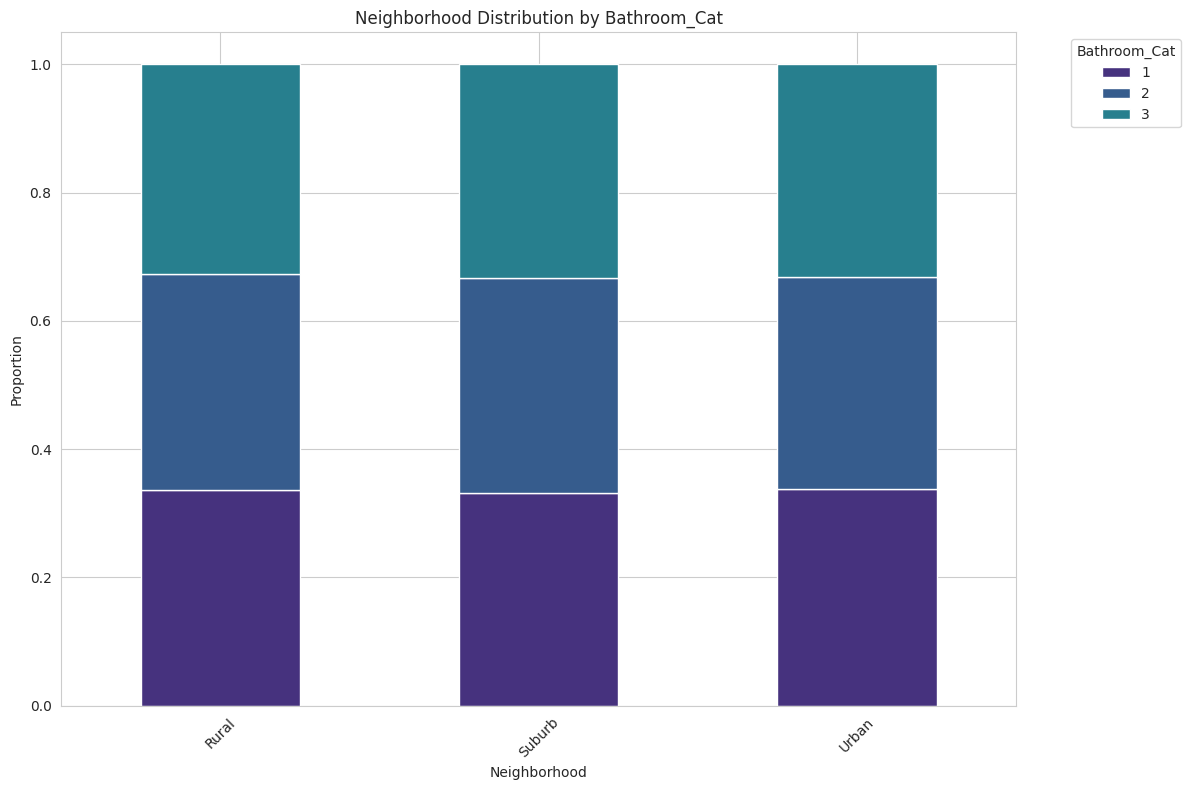


Relationship between Neighborhood and Size_Cat:

Cross-tabulation (% within Neighborhood):



Chi-square test results:
Chi2 = 13.45, p-value = 0.0364, Degrees of Freedom = 6
Significant relationship: Yes


<Figure size 1000x600 with 0 Axes>

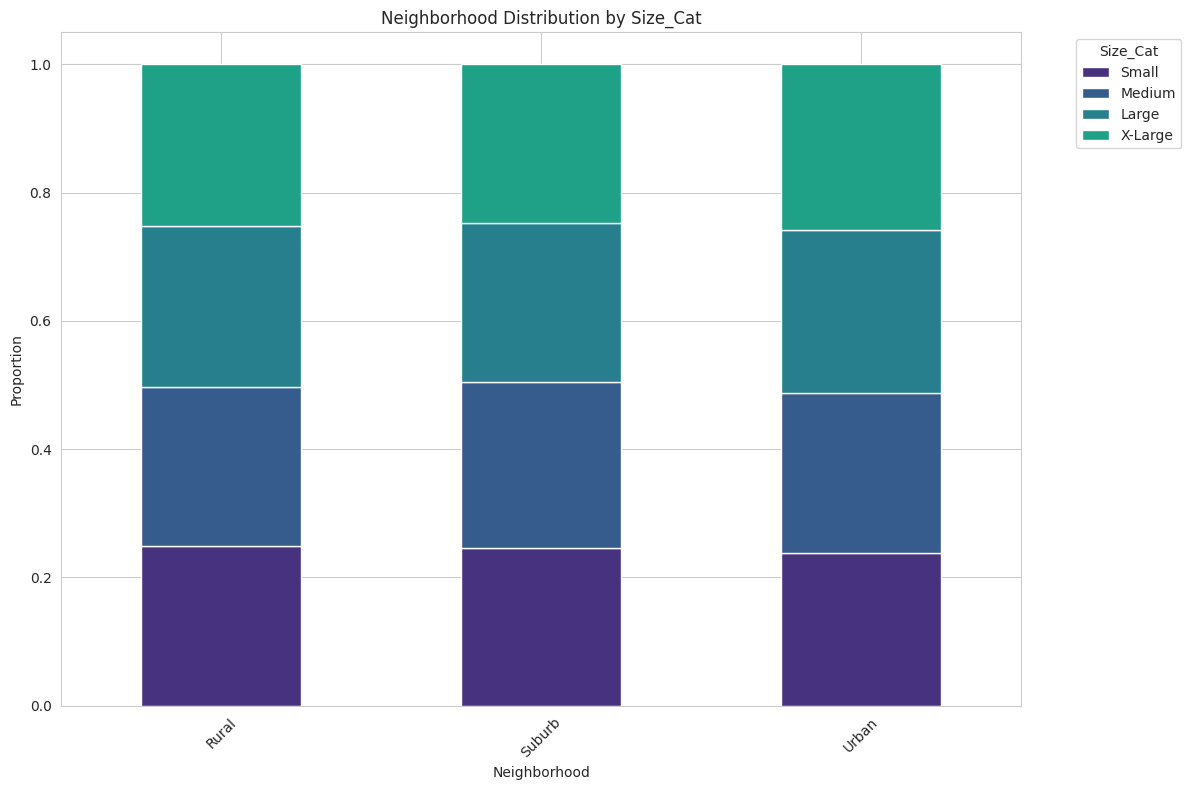

In [36]:
## 3. Categorical vs. Categorical Analysis
# Since we only have one categorical variable (Neighborhood), we'll analyze its relationship
# with discretized numerical variables

# Create discretized versions of numerical features
df['Bedroom_Cat'] = pd.cut(df['Bedrooms'], bins=[1, 2, 3, 4, 5], labels=['2', '3', '4', '5'])
df['Bathroom_Cat'] = pd.cut(df['Bathrooms'], bins=[0.5, 1.5, 2.5, 3.5], labels=['1', '2', '3'])
df['Size_Cat'] = pd.cut(df['SquareFeet'], bins=[999, 1500, 2000, 2500, 3000],
                        labels=['Small', 'Medium', 'Large', 'X-Large'])

# Cross-tabulation and chi-square tests
for cat_var in ['Bedroom_Cat', 'Bathroom_Cat', 'Size_Cat']:
    print(f"\nRelationship between Neighborhood and {cat_var}:")

    # Create cross-tabulation
    crosstab = pd.crosstab(df['Neighborhood'], df[cat_var], normalize='index')

    # Perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Neighborhood'], df[cat_var]))

    print(f"\nCross-tabulation (% within Neighborhood):")
    display(crosstab.style.format("{:.1%}").background_gradient(cmap='Blues'))

    print(f"\nChi-square test results:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}, Degrees of Freedom = {dof}")
    print(f"Significant relationship: {'Yes' if p < 0.05 else 'No'}")

    # Stacked bar chart
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Neighborhood Distribution by {cat_var}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title=cat_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



Multivariate Analysis - Interaction Effects


<Figure size 1200x800 with 0 Axes>

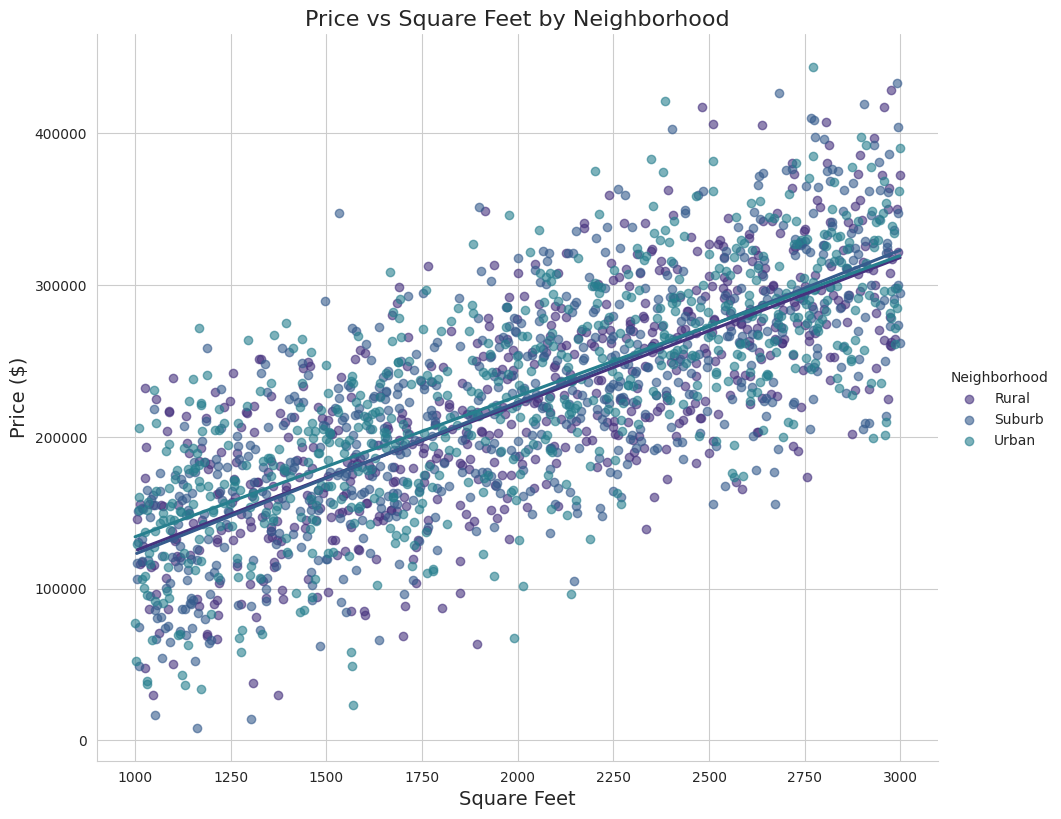

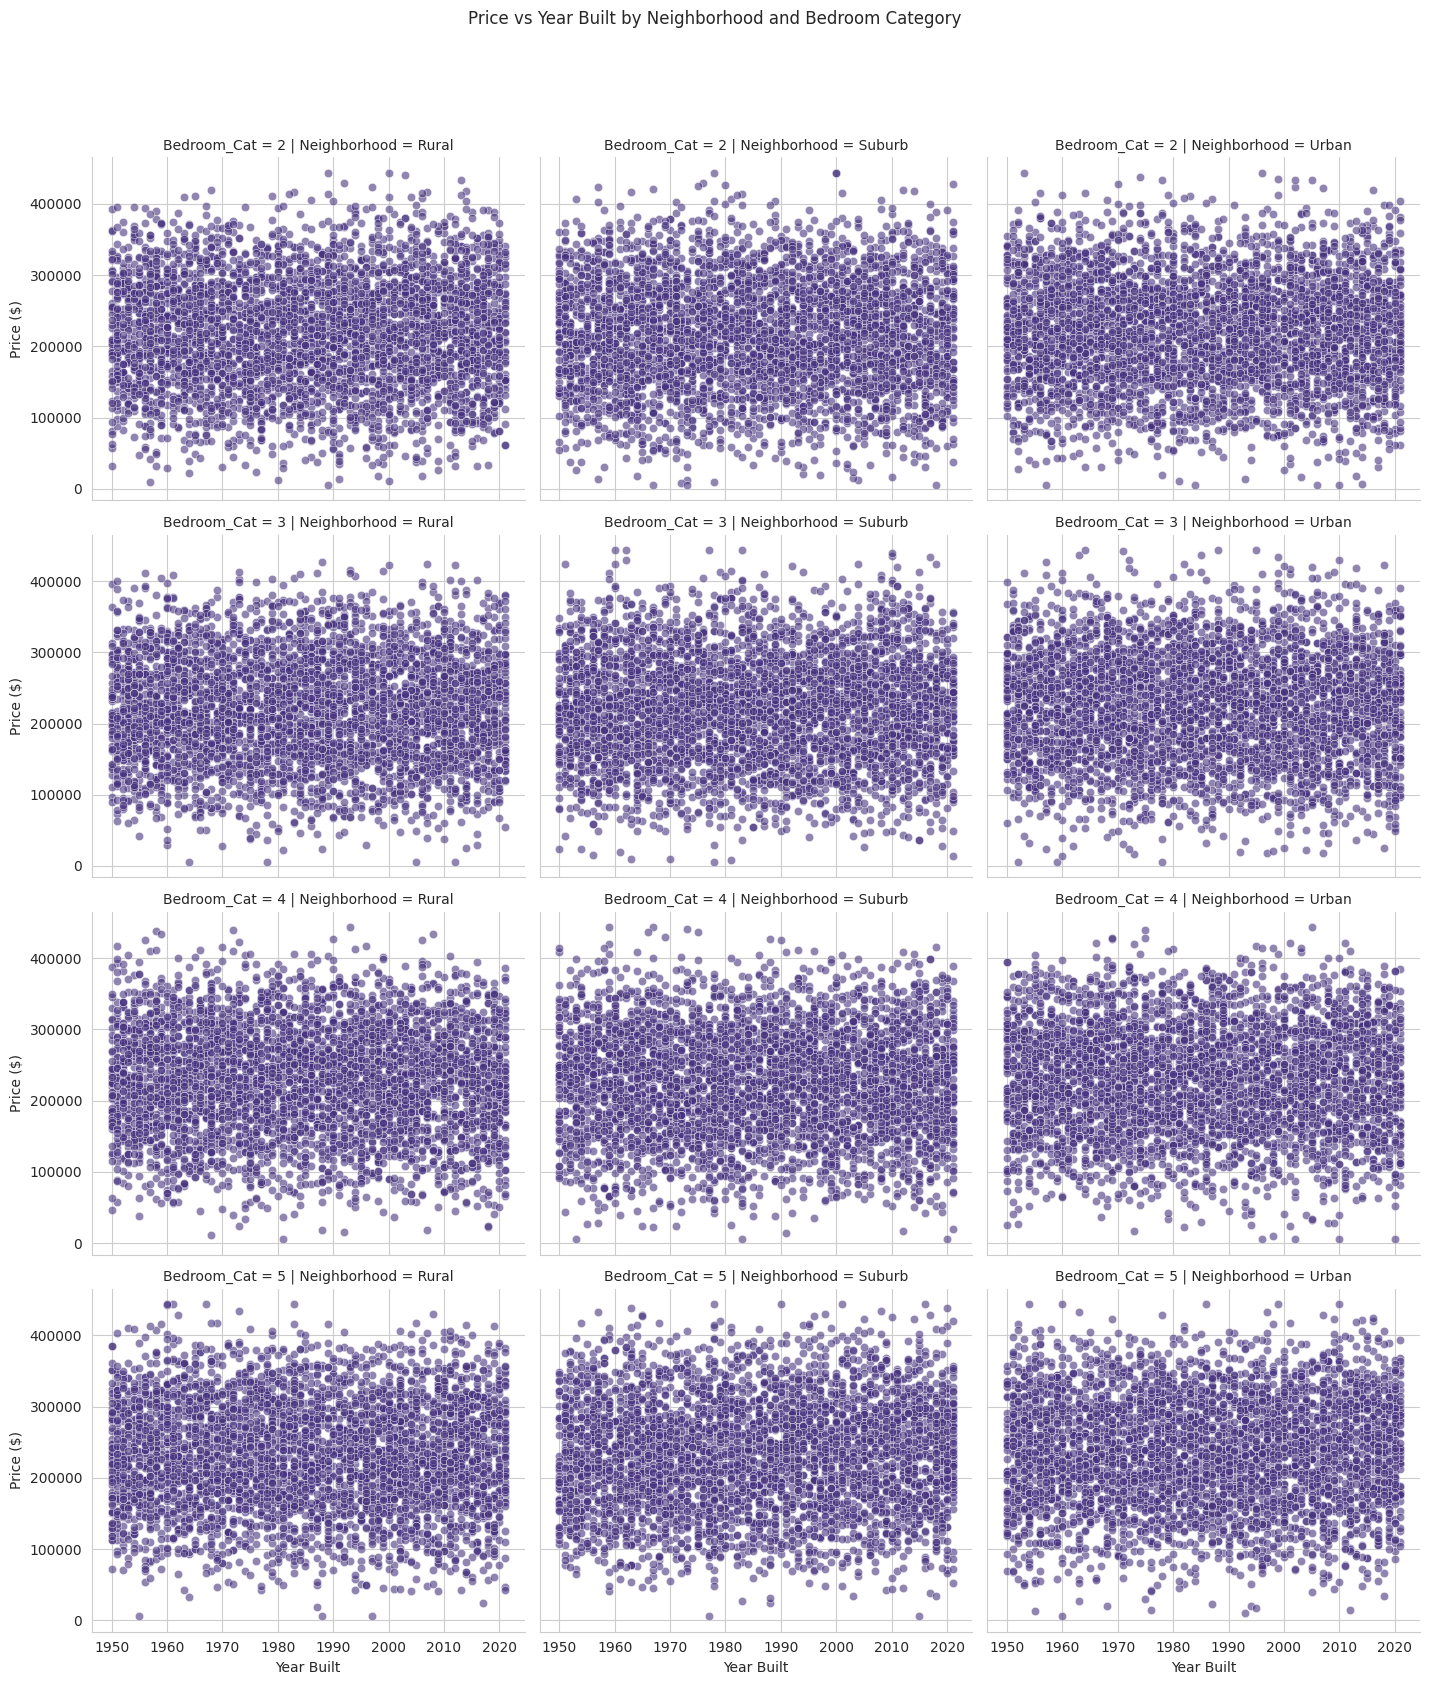

In [37]:
## 4. Interaction Effects (Multivariate Analysis)
print("\n" + "="*50)
print("Multivariate Analysis - Interaction Effects")
print("="*50)

# Interaction between neighborhood and square footage on price
plt.figure(figsize=(12, 8))
sns.lmplot(x='SquareFeet', y='Price', hue='Neighborhood', data=df.sample(2000) if len(df) > 5000 else df,
           height=8, aspect=1.2, ci=None, scatter_kws={'alpha': 0.6})
plt.title('Price vs Square Feet by Neighborhood', fontsize=16)
plt.xlabel('Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()

# Facet grid of price vs year built by neighborhood and bedroom count
g = sns.FacetGrid(df, col='Neighborhood', row='Bedroom_Cat', height=4, aspect=1.2)
g.map(sns.scatterplot, 'YearBuilt', 'Price', alpha=0.6)
g.set_axis_labels('Year Built', 'Price ($)')
g.fig.suptitle('Price vs Year Built by Neighborhood and Bedroom Category', y=1.05)
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-1105789110.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Price', index='Neighborhood', columns='Bedroom_Cat', aggfunc='mean')


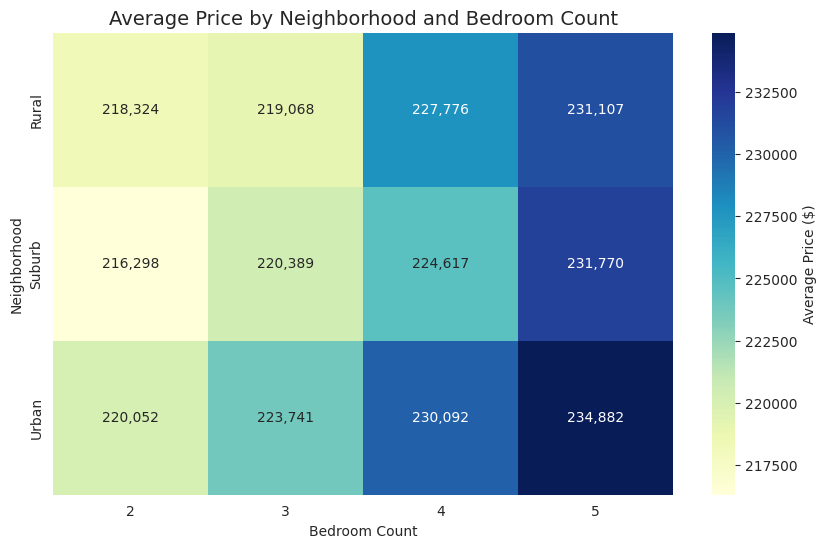

In [38]:
# Heatmap of average price by neighborhood and bedroom count
pivot_table = df.pivot_table(values='Price', index='Neighborhood', columns='Bedroom_Cat', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=",.0f", cmap='YlGnBu', cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Price by Neighborhood and Bedroom Count', fontsize=14)
plt.xlabel('Bedroom Count')
plt.ylabel('Neighborhood')
plt.show()

# Feature Engineering

In [39]:
# Create new features
df['PropertyAge'] = 2025 - df['YearBuilt']  # Current year is 2025
df['PricePerSqFt'] = df['Price'] / df['SquareFeet']
df['RoomCount'] = df['Bedrooms'] + df['Bathrooms']
df['BedBathRatio'] = df['Bedrooms'] / df['Bathrooms'].replace(0, 1)  # Avoid division by zero

In [40]:
# Log transformations for skewed variables
df['LogPrice'] = np.log1p(df['Price'])
df['LogSquareFeet'] = np.log1p(df['SquareFeet'])

In [41]:
# Bin numerical variables
df['SquareFeet_Binned'] = pd.cut(df['SquareFeet'], bins=5, labels=['Small', 'Medium', 'Large', 'X-Large', 'XX-Large'])
df['Age_Binned'] = pd.cut(df['PropertyAge'], bins=[0, 10, 20, 30, 40, 50, 100],
                          labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])

In [42]:
# Encode categorical variables
# One-hot encoding
neighborhood_dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')
df = pd.concat([df, neighborhood_dummies], axis=1)

In [43]:
# Target encoding
neighborhood_target_enc = df.groupby('Neighborhood')['Price'].mean().to_dict()
df['Neighborhood_Encoded'] = df['Neighborhood'].map(neighborhood_target_enc)

/tmp/ipython-input-43-1908760519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighborhood_target_enc = df.groupby('Neighborhood')['Price'].mean().to_dict()


In [44]:
# Interaction features
df['Urban_Large'] = (df['Neighborhood'] == 'Urban') & (df['SquareFeet_Binned'].isin(['Large', 'X-Large', 'XX-Large']))
df['Rural_Old'] = (df['Neighborhood'] == 'Rural') & (df['Age_Binned'].isin(['31-40', '41-50', '50+']))

In [45]:
# Polynomial features
df['SquareFeet_Sq'] = df['SquareFeet'] ** 2
df['Bedrooms_Sq'] = df['Bedrooms'] ** 2

In [47]:
# Create a new feature: Price tier
df['PriceTier'] = pd.qcut(df['Price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])

In [48]:
# Display new features
print("\nNew Features Created:")
print(df[['PropertyAge', 'PricePerSqFt', 'RoomCount', 'LogPrice', 'SquareFeet_Binned',
          'Age_Binned', 'Neighborhood_Encoded', 'PriceTier']].head())


New Features Created:
   PropertyAge  PricePerSqFt  RoomCount   LogPrice SquareFeet_Binned  \
0         56.0    101.295994        5.0  12.280049             Large   
1         45.0     79.306312        5.0  12.180833           X-Large   
2         55.0    164.995168        3.0  12.634251             Large   
3         29.0     90.142453        3.0  12.239448           X-Large   
4         24.0    127.904338        7.0  12.515164             Large   

  Age_Binned Neighborhood_Encoded  PriceTier  
0        50+        224098.561321  Mid-Range  
1      41-50        224098.561321  Mid-Range  
2        50+        223231.723897     Luxury  
3      21-30        227165.575957  Mid-Range  
4      21-30        223231.723897    Premium  


# Time-series Analysis

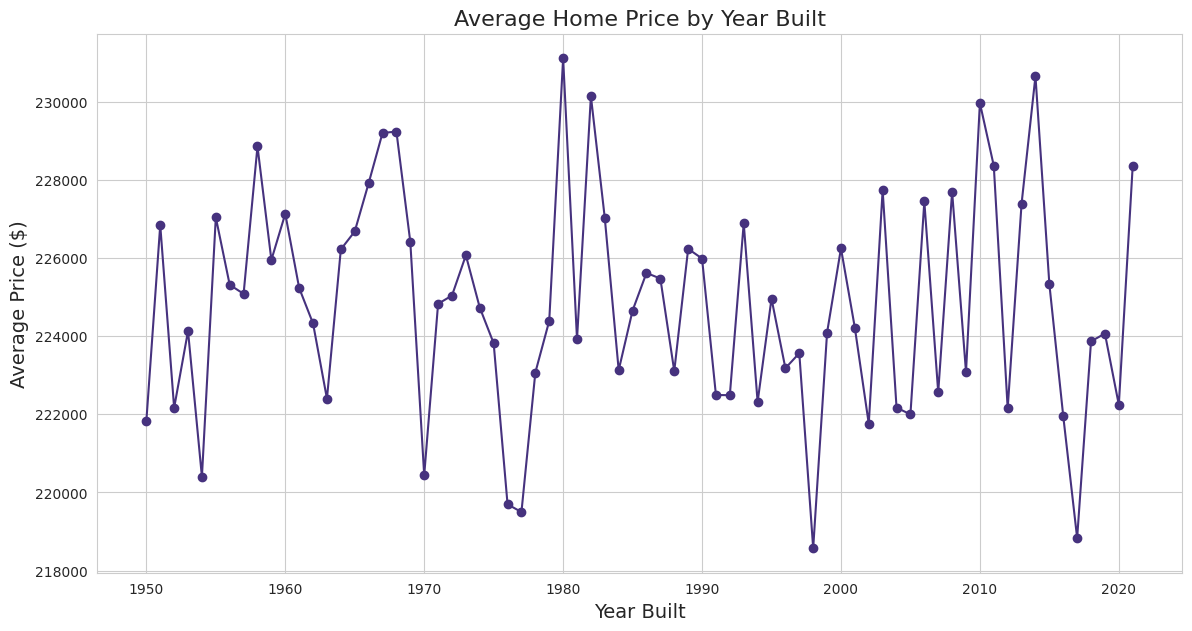

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Time-series analysis by year built
# Group by YearBuilt and calculate average price
ts_df = df.groupby('YearBuilt')['Price'].agg(['mean', 'count']).reset_index()
ts_df = ts_df[ts_df['count'] > 10]  # Filter years with sufficient data
ts_df.set_index('YearBuilt', inplace=True)

# Plot price trends over time
plt.figure(figsize=(14, 7))
plt.plot(ts_df.index, ts_df['mean'], marker='o')
plt.title('Average Home Price by Year Built', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.grid(True)
plt.show()

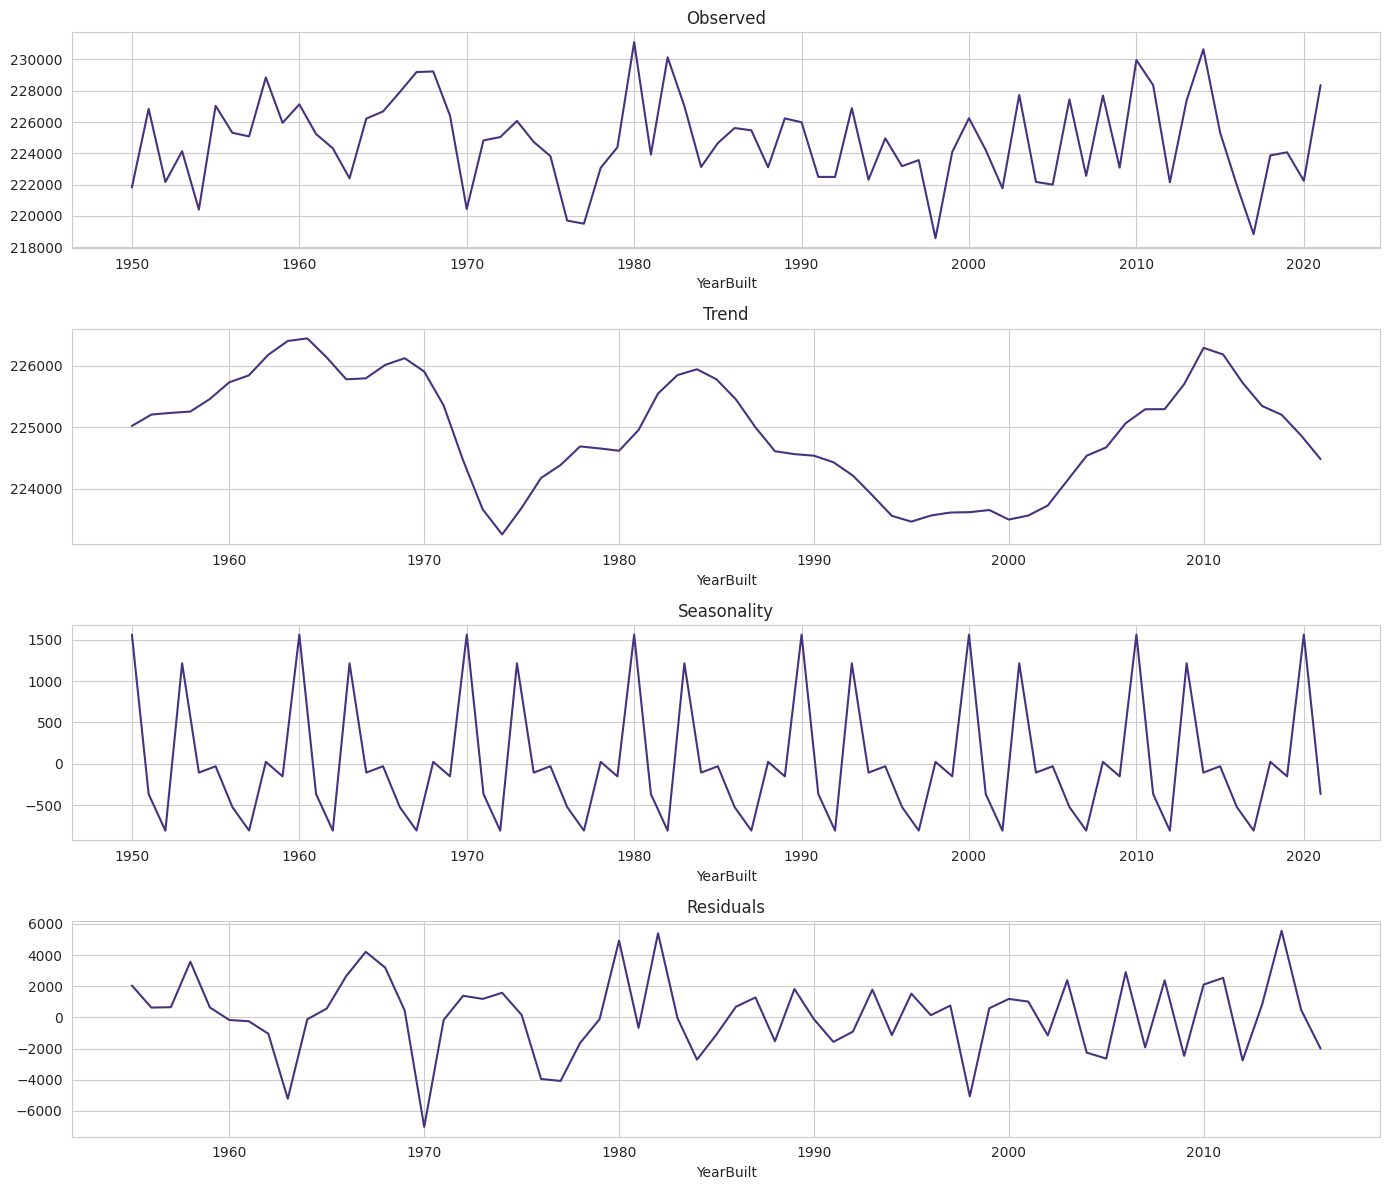

In [57]:
# Decompose time series
ts_df.sort_index(inplace=True)
decomposition = seasonal_decompose(ts_df['mean'], period=10, model='additive')

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonality')
decomposition.resid.plot(ax=ax4, title='Residuals')
plt.tight_layout()
plt.show()

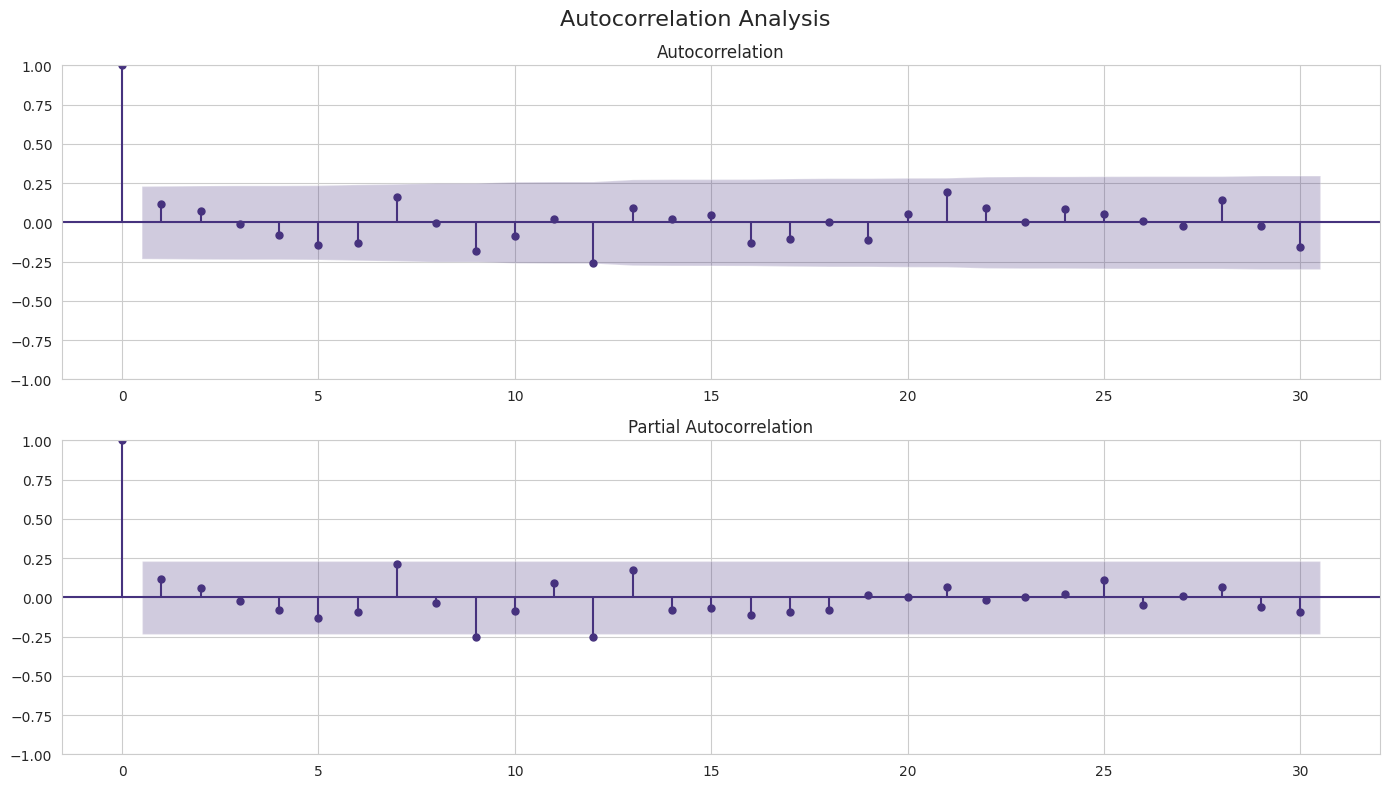


Correlation with Time Features:
Price    1.000000
Year    -0.058635
Name: Price, dtype: float64


In [58]:
# Autocorrelation analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
sm.graphics.tsa.plot_acf(ts_df['mean'].dropna(), lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(ts_df['mean'].dropna(), lags=30, ax=ax2)
plt.suptitle('Autocorrelation Analysis', fontsize=16)
plt.tight_layout()
plt.show()

# Time-based feature importance
time_corr = df.groupby('YearBuilt')['Price'].mean().reset_index()
time_corr['Year'] = time_corr['YearBuilt']
time_corr = time_corr.corr()['Price'].drop('YearBuilt')
print("\nCorrelation with Time Features:")
print(time_corr)

# Geospatial Analysis (Simulated)

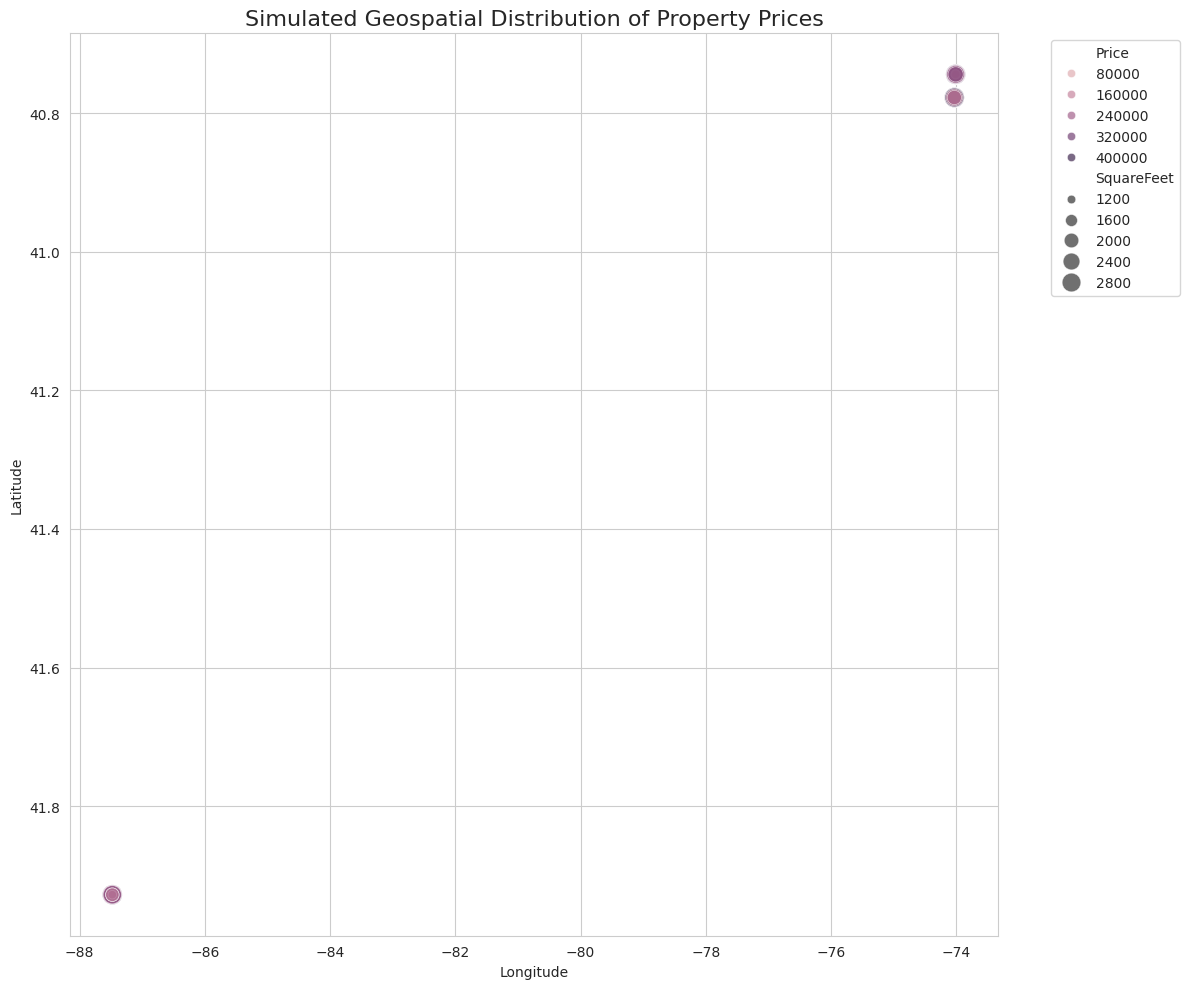

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


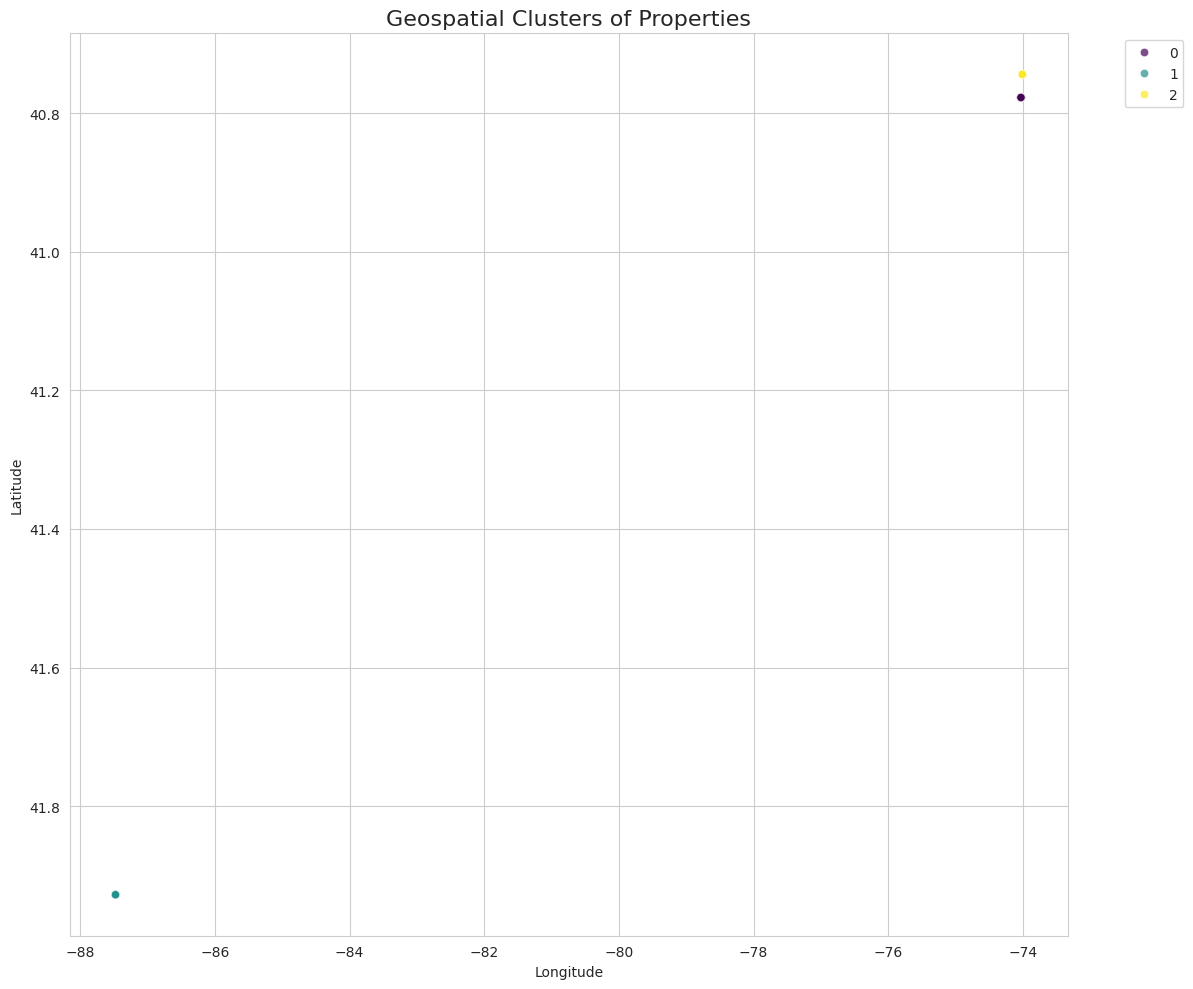


Geospatial Cluster Analysis:


GeoCluster          Price   SquareFeet  PropertyAge Neighborhood
0           0  227165.575957  2017.416913    39.655845        Urban
1           1  224098.561321  2001.621132    39.646738        Rural
2           2  223231.723897  2000.151127    39.484720       Suburb

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Since we don't have real coordinates, we'll simulate location-based patterns
# Create simulated coordinates based on neighborhood
np.random.seed(42)
neighborhood_coords = {
    'Urban': (40.7128, -74.0060),  # NYC
    'Suburb': (40.7580, -73.9855),  # Manhattan
    'Rural': (41.8781, -87.6298)    # Chicago
}

# Generate coordinates with some noise
def generate_lat(neighborhood):
    lat, lon = neighborhood_coords[neighborhood]
    return lat + np.random.normal(0, 0.1)

def generate_lon(neighborhood):
    lat, lon = neighborhood_coords[neighborhood]
    return lon + np.random.normal(0, 0.1)

# Generate coordinates
df['Latitude'] = df['Neighborhood'].apply(generate_lat)
df['Longitude'] = df['Neighborhood'].apply(generate_lon)

# Plot geospatial distribution
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Price',
    size='SquareFeet',
    sizes=(20, 200),
    alpha=0.7,
    data=df.sample(1000) if len(df) > 5000 else df
)
plt.title('Simulated Geospatial Distribution of Property Prices', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cluster analysis based on location
coords = df[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=5, random_state=42)
df['GeoCluster'] = kmeans.fit_predict(coords)

# Plot clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='GeoCluster',
    palette='viridis',
    alpha=0.7,
    data=df.sample(1000) if len(df) > 5000 else df
)
plt.title('Geospatial Clusters of Properties', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
cluster_analysis = df.groupby('GeoCluster').agg({
    'Price': 'mean',
    'SquareFeet': 'mean',
    'PropertyAge': 'mean',
    'Neighborhood': lambda x: x.mode()[0]
}).reset_index()

print("\nGeospatial Cluster Analysis:")
print("="*50)
display(cluster_analysis)